# Table of Contents

1. **Import datasets**
2. **Weekly Order Trends: Volume & Cart Size (slide 4)**
3. **Macro-view of Revenue Drivers: Number of Orders vs. Avg. Price of Cart Across Time (slide 5 & 6)**
4. **Micro-view of Revenue Drivers: Avg. Cart Size vs. Avg Product Price Across Time (slide 8 & 9)**
5. **Boxplot: Price Ranges Across Departments (slide 11)**
6. **Departments ranked by Order Frequency (slide 12)**
7. **Revenue per order: Top Value-Generating Departments (slide 13)**
8. **Departments ranked by Nonreorder Frequency (slide 14)**
9. **Reorder Metric for Customer Segmentation (Loyalty; Frequency) (slide 15)**
10. **Boxplots: Nonreorder behavior across time (slide 16)**
11. **Heatmap: Department Rankings across Metrics (slide 17, 18, 19)**
12. **Heatmap: Department Index (slide 20 & 21)**
13. **Line graph: Department Share of Total Sales Across Time (slide 23)**
14. **Customer Demographics: Fam Size & Income (slide 24)**
15. **Case study: Personal Care Dept by Demographic Group (slide 25)**
16. **Heatmap: Normalized Purchases by Department and Demographic Group (slide 26)**
17. **Heatmaps: Nonreorder Proportion of Purchases by Demographic Group and Time (slide 27 & 28)**


In [2]:
# Import libraries. 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
path = r'/Users/amyzhang/Desktop/Instacart Basket Analysis/'

# 1) Import datasets

In [10]:
order_df= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data 2', 'order_activity.pkl'))

In [12]:
opc_df= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data 2', 'opc_with_dept.pkl'))

In [14]:
customer_df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data 2', 'customer_demog_df.pkl'))

# 2) Weekly Order Trends: Volume & Cart Size (slide 4)

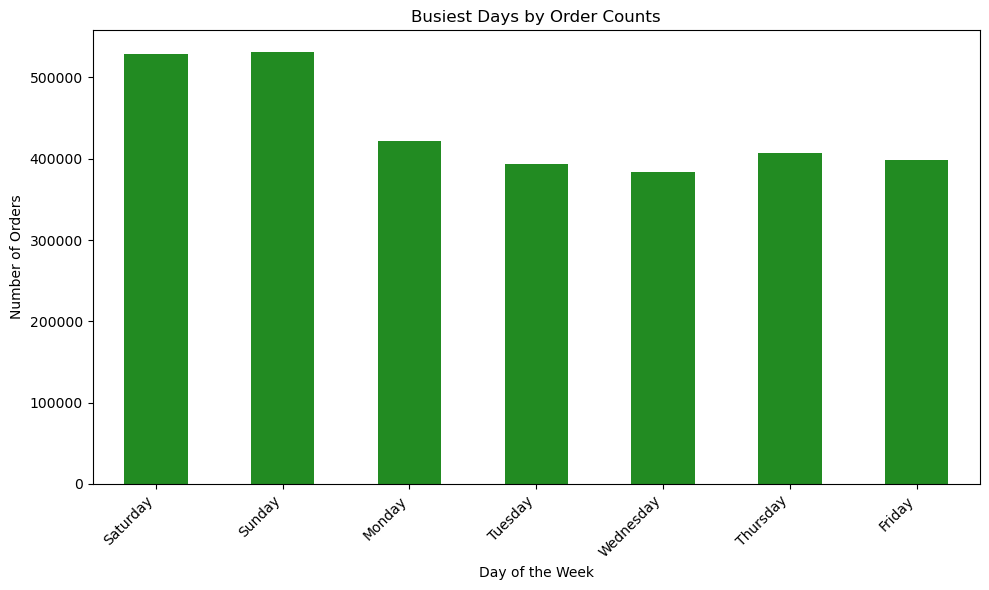

In [20]:
# Aggregate the values.
order_counts_5 = order_df['order_day_of_week'].value_counts()

# Define the mapping for days of the week (Saturday = 0, Sunday = 1, ..., Friday = 6)
day_labels = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Ensure that the data is ordered from Saturday to Friday without sorting by values
order_counts_5 = order_counts_5.reindex(range(7)).fillna(0)  # Use fillna() instead of fillvalue

# Create a solid green color
color = "#228B22"  # Non-obnoxious green

# Create the plot
fig_w, ax = plt.subplots(figsize=(10, 6))
order_counts_5.plot(kind='bar', color=color, ax=ax)

# Customize the x-axis with day labels from Saturday to Friday
ax.set_xticks(range(len(order_counts_5)))
ax.set_xticklabels(day_labels, rotation=45, ha='right')

# Add axis labels and title
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Number of Orders')
ax.set_title('Busiest Days by Order Counts')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [23]:
# Save the plot
save_path = os.path.join(path, '04 Analysis', 'Viz', 'BAR_BusyDay_orders.png')
fig_w.figure.savefig(save_path, format='png', dpi=300)

# Print confirmation
print(f"Plot saved to {save_path}")

Plot saved to /Users/amyzhang/Desktop/Instacart Basket Analysis/04 Analysis/Viz/BAR_BusyDay_orders.png


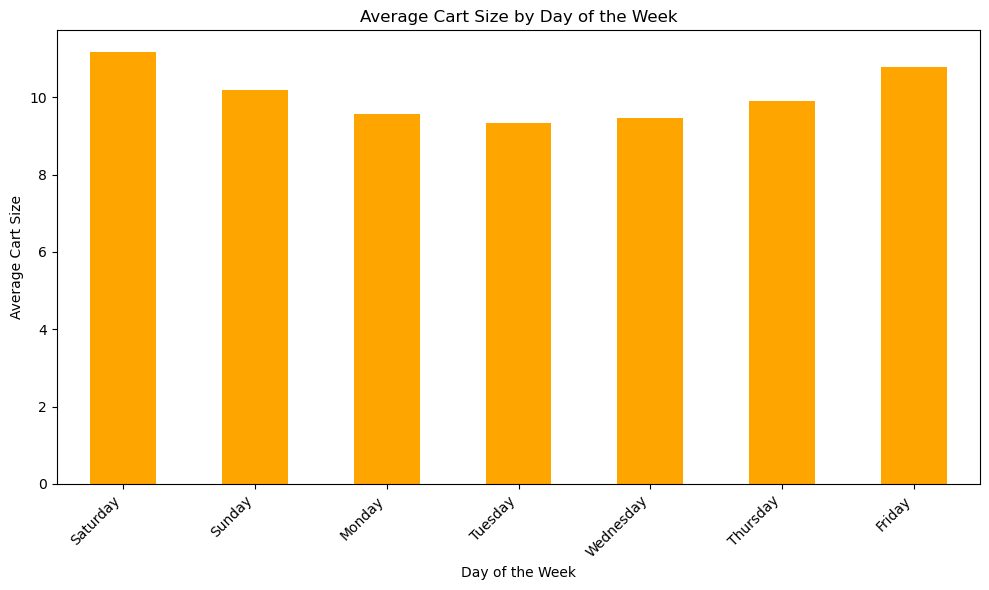

In [26]:
# Calculate the mean of total_products by day of the week
mean_cart_size = order_df.groupby('order_day_of_week')['total_products'].mean()

# Define the mapping for days of the week (Saturday = 0, Sunday = 1, ..., Friday = 6)
day_labels = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Create the plot
fig_x, ax = plt.subplots(figsize=(10, 6))

# Plot the average cart size with a solid orange color
mean_cart_size.plot(kind='bar', color="#FFA500", ax=ax)

# Customize the x-axis with day labels from Saturday to Friday
ax.set_xticks(range(len(mean_cart_size)))
ax.set_xticklabels([day_labels[i] for i in range(7)], rotation=45, ha='right')

# Add axis labels and title
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Average Cart Size')
ax.set_title('Average Cart Size by Day of the Week')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [29]:
# Save the plot
save_path = os.path.join(path, '04 Analysis', 'Viz', 'BAR_busy_cart.png')
fig_x.figure.savefig(save_path, format='png', dpi=300)

# Print confirmation
print(f"Plot saved to {save_path}")

Plot saved to /Users/amyzhang/Desktop/Instacart Basket Analysis/04 Analysis/Viz/BAR_busy_cart.png


# 3) Macro-view of Revenue Drivers: Number of Orders vs. Avg Price of Order Across Time (Slide 5 & 6)

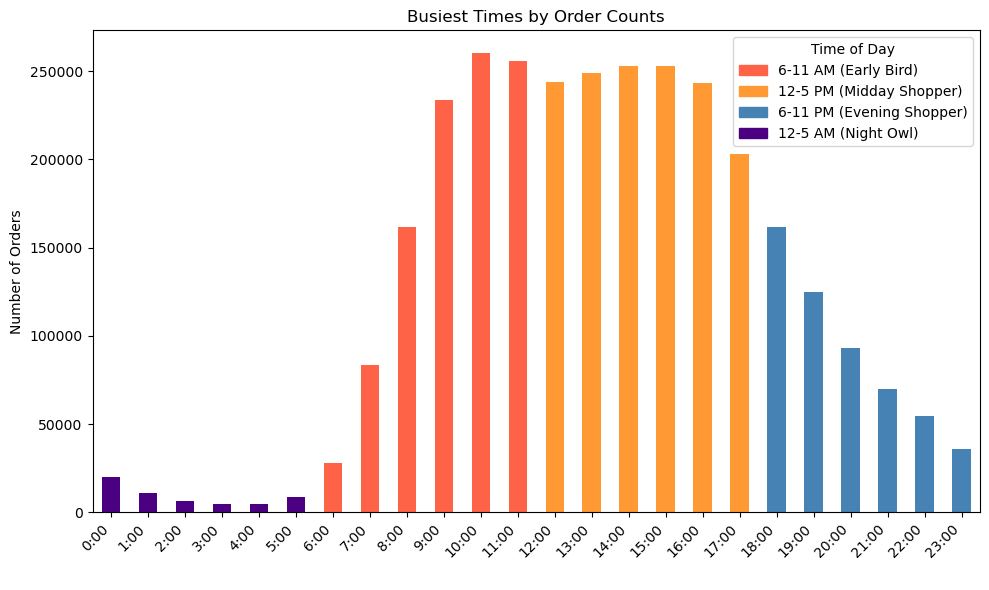

In [37]:
import matplotlib.patches as mpatches

# Aggregate the values
ocounts = order_df['order_time'].value_counts()

# Sort data by the time of day (0 to 23)
ocounts = ocounts.sort_index()  # Sort by the index (which represents the hour of the day)

# Define color map based on time of day
color_map = {
    'early_bird': '#FF6347',       # Warm red-orange tone
    'midday_shopper': '#FF9933',   # Warm yellow-orange tone
    'evening_shopper': '#4682B4',  # Lighter steel blue tone
    'night_owl': '#4B0082'         # Cool indigo tone
}

# Define the time periods (in hours)
time_periods = {
    'early_bird': range(6, 12),    # 6am to 11am
    'midday_shopper': range(12, 18), # 12pm to 5pm
    'evening_shopper': range(18, 24), # 6pm to 11pm
    'night_owl': range(0, 6)       # 12am to 5am
}

# Function to assign colors based on time periods
def get_color(hour):
    if hour in time_periods['early_bird']:
        return color_map['early_bird']
    elif hour in time_periods['midday_shopper']:
        return color_map['midday_shopper']
    elif hour in time_periods['evening_shopper']:
        return color_map['evening_shopper']
    else:
        return color_map['night_owl']

# Apply color function to each hour in ocounts
colors = [get_color(hour) for hour in ocounts.index]

# Create the plot
fig_ugh, ax = plt.subplots(figsize=(10, 6))
busytime_ocounts = ocounts.plot(kind='bar', color=colors, ax=ax)

# Customize the x-axis with time labels
time_labels = [f"{hour}:00" for hour in range(24)]
ax.set_xticks(range(len(ocounts)))
ax.set_xticklabels([time_labels[i] for i in ocounts.index], rotation=45, ha='right')

# Add axis labels and title
ax.set_xlabel(' ')
ax.set_ylabel('Number of Orders')
ax.set_title('Busiest Times by Order Counts')

# Create the legend
legend_labels = ['6-11 AM (Early Bird)', '12-5 PM (Midday Shopper)', '6-11 PM (Evening Shopper)', '12-5 AM (Night Owl)']
patches = [
    mpatches.Patch(color=color_map['early_bird'], label=legend_labels[0]),
    mpatches.Patch(color=color_map['midday_shopper'], label=legend_labels[1]),
    mpatches.Patch(color=color_map['evening_shopper'], label=legend_labels[2]),
    mpatches.Patch(color=color_map['night_owl'], label=legend_labels[3])
]

# Add the legend to the plot
ax.legend(handles=patches, title="Time of Day")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [40]:
# Save the plot
save_path = os.path.join(path, '04 Analysis', 'Viz', 'BusyTime_Ocounts.png')
fig_ugh.figure.savefig(save_path, format='png', dpi=300)

# Print confirmation
print(f"Plot saved to {save_path}")

Plot saved to /Users/amyzhang/Desktop/Instacart Basket Analysis/04 Analysis/Viz/BusyTime_Ocounts.png


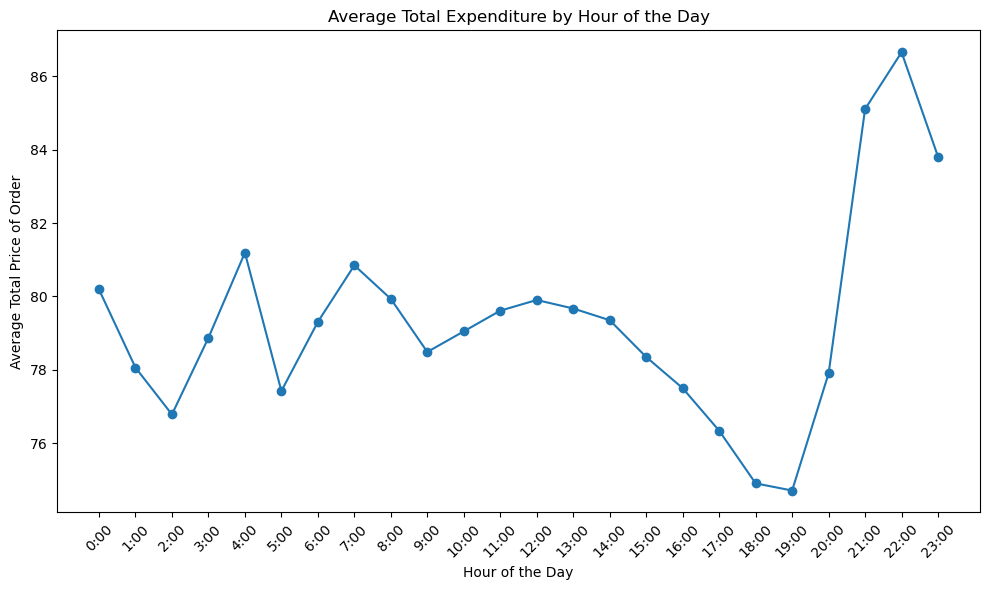

In [43]:
# The average amount spent per entire order by hour of day -- can see when people are spending the most in a single order.

# Group by order_time and calculate the mean of total_price for each hour
avg_expenditure_by_hour = order_df.groupby('order_time')['total_price'].mean()

# Plotting the result
spendfig, ax = plt.subplots(figsize=(10, 6))

# Plot the average expenditure by hour
avg_expenditure_by_hour.plot(kind='line', marker='o', ax=ax)

# Customize the plot
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Average Total Price of Order')
ax.set_title('Average Total Expenditure by Hour of the Day')
ax.set_xticks(range(24))
ax.set_xticklabels([f'{i}:00' for i in range(24)], rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [46]:
# Save the plot
save_path = os.path.join(path, '04 Analysis', 'Viz', 'Time_OrderCost.png')
spendfig.savefig(save_path, format='png', dpi=300)

# Print confirmation
print(f"Plot saved to {save_path}")

Plot saved to /Users/amyzhang/Desktop/Instacart Basket Analysis/04 Analysis/Viz/Time_OrderCost.png


# 4) Micro-view of Revenue Drivers: Avg Cart Size vs. Avg Product Price Across the day (Slide 8 & 9)

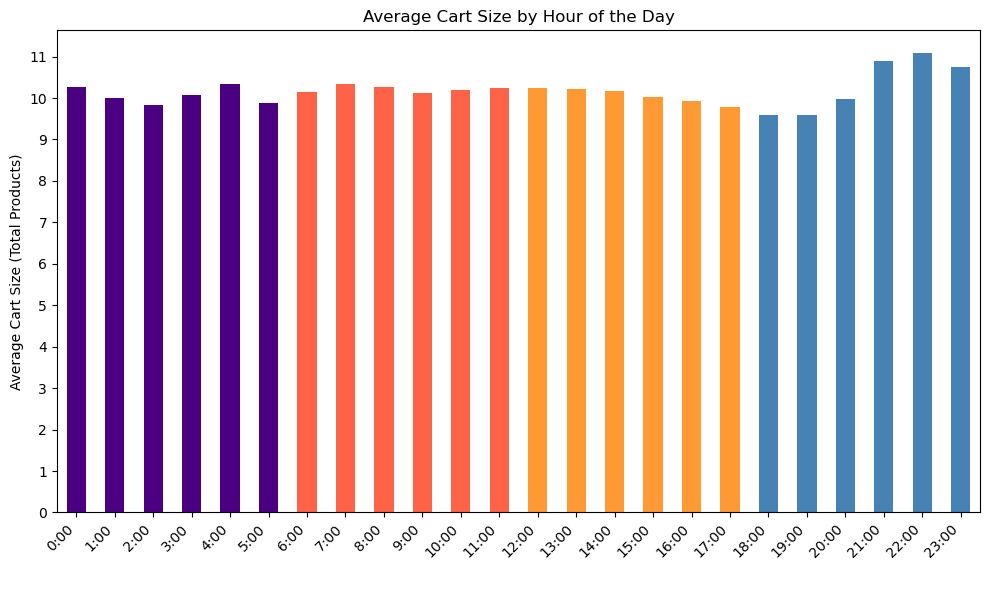

In [50]:
# Aggregate the values
# Calculate the mean of 'total_products' by order hour (group by 'order_time' and get the mean 'total_products')
cart_size_by_hour = order_df.groupby('order_time')['total_products'].mean()

# Sort data by the time of day (0 to 23)
cart_size_by_hour = cart_size_by_hour.sort_index()

# Define color map based on time of day
color_map = {
    'early_bird': '#FF6347',       # Warm red-orange tone
    'midday_shopper': '#FF9933',   # Warm yellow-orange tone
    'evening_shopper': '#4682B4',  # Lighter steel blue tone
    'night_owl': '#4B0082'         # Cool indigo tone
}

# Define the time periods (in hours)
time_periods = {
    'early_bird': range(6, 12),    # 6am to 11am
    'midday_shopper': range(12, 18), # 12pm to 5pm
    'evening_shopper': range(18, 24), # 6pm to 11pm
    'night_owl': range(0, 6)       # 12am to 5am
}

# Function to assign colors based on time periods
def get_color(hour):
    if hour in time_periods['early_bird']:
        return color_map['early_bird']
    elif hour in time_periods['midday_shopper']:
        return color_map['midday_shopper']
    elif hour in time_periods['evening_shopper']:
        return color_map['evening_shopper']
    else:
        return color_map['night_owl']

# Apply color function to each hour in cart_size_by_hour
colors = [get_color(hour) for hour in cart_size_by_hour.index]

# Create the plot
fig_bar, ax = plt.subplots(figsize=(10, 6))
cart_size_by_hour.plot(kind='bar', color=colors, ax=ax)

# Customize the x-axis with time labels
time_labels = [f"{hour}:00" for hour in range(24)]
ax.set_xticks(range(len(cart_size_by_hour)))
ax.set_xticklabels([time_labels[i] for i in cart_size_by_hour.index], rotation=45, ha='right')

# Add axis labels and title
ax.set_xlabel(' ')
ax.set_ylabel('Average Cart Size (Total Products)')
ax.set_title('Average Cart Size by Hour of the Day')

# Set Y-axis ticks to be spaced by 1 or 2 units
y_min, y_max = ax.get_ylim()
ax.set_yticks(range(int(y_min), int(y_max) + 1, 1))  # Adjust the interval as needed (1 or 2)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [53]:
# Save the plot
save_path = os.path.join(path, '04 Analysis', 'Viz', 'BusyTime_CartSize.png')
fig_bar.figure.savefig(save_path, format='png', dpi=300)

# Print confirmation
print(f"Plot saved to {save_path}")

Plot saved to /Users/amyzhang/Desktop/Instacart Basket Analysis/04 Analysis/Viz/BusyTime_CartSize.png


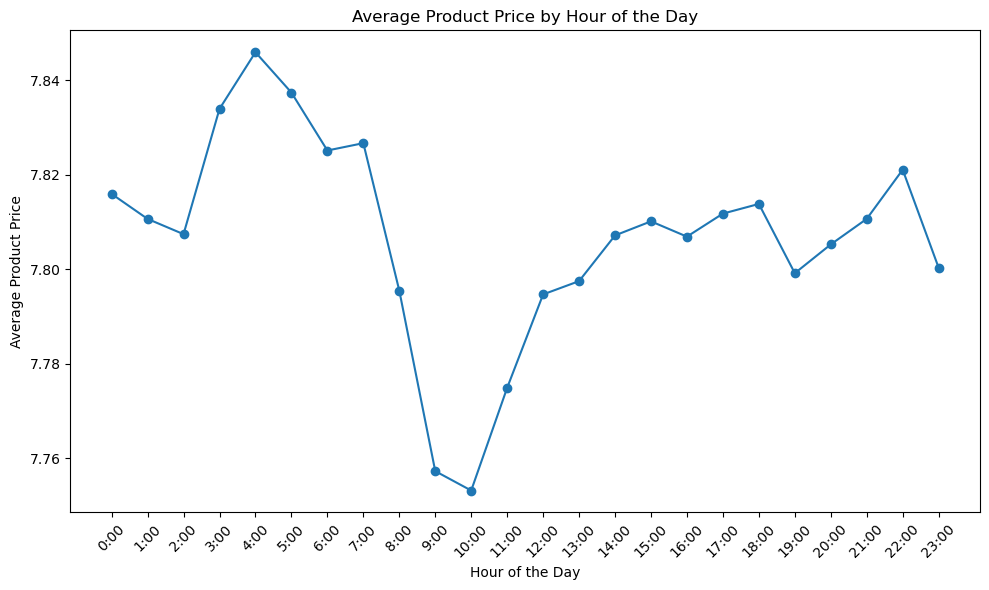

In [56]:
# Group by order_time and calculate the mean of 'prices' for each hour
avg_exp_hour = opc_df.groupby('order_time')['prices'].mean()

# Plotting the result
expfig, ax = plt.subplots(figsize=(10, 6))

# Plot the average expenditure by hour
avg_exp_hour.plot(kind='line', marker='o', ax=ax)

# Customize the plot
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Average Product Price')
ax.set_title('Average Product Price by Hour of the Day')
ax.set_xticks(range(24))
ax.set_xticklabels([f'{i}:00' for i in range(24)], rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [59]:
# Save the plot
save_path = os.path.join(path, '04 Analysis', 'Viz', 'Time_AvgProductPrice.png')
expfig.savefig(save_path, format='png', dpi=300)

# Print confirmation
print(f"Plot saved to {save_path}")

Plot saved to /Users/amyzhang/Desktop/Instacart Basket Analysis/04 Analysis/Viz/Time_AvgProductPrice.png


# 5) Price Ranges Across Departments (Slide 11)

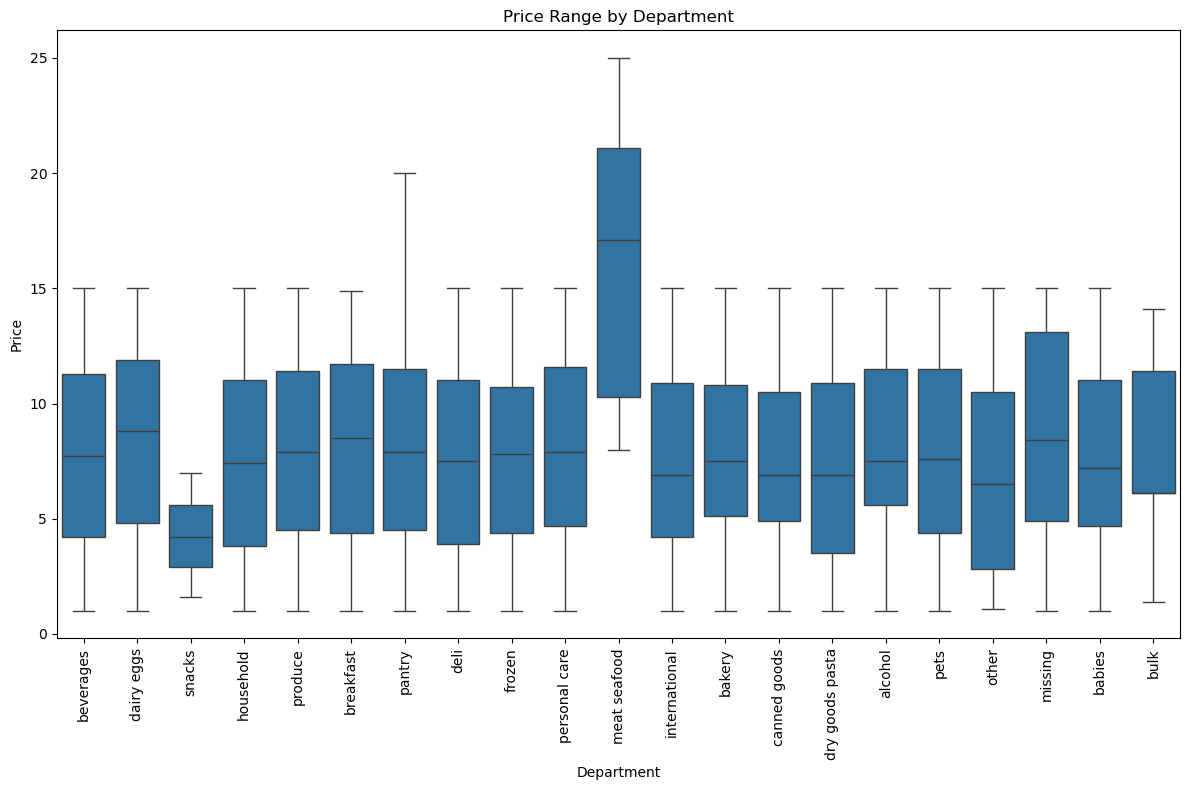

In [63]:
# Create the box plot
plot = plt.figure(figsize=(12, 8))
sns.boxplot(x='department', y='prices', data=opc_df)

# Customize the plot
plt.xticks(rotation=90)  # Rotate the department labels for better readability
plt.xlabel('Department')
plt.ylabel('Price')
plt.title('Price Range by Department')

# Show the plot
plt.tight_layout()
plt.show()


In [66]:
# Save the plot
save_path = os.path.join(path, '04 Analysis', 'Viz', 'Dept_pricerange.png')
plot.savefig(save_path, format='png', dpi=300)

# Print confirmation
print(f"Plot saved to {save_path}")

Plot saved to /Users/amyzhang/Desktop/Instacart Basket Analysis/04 Analysis/Viz/Dept_pricerange.png


# 6) Order Frequency vs. Revenue (Slide 12)

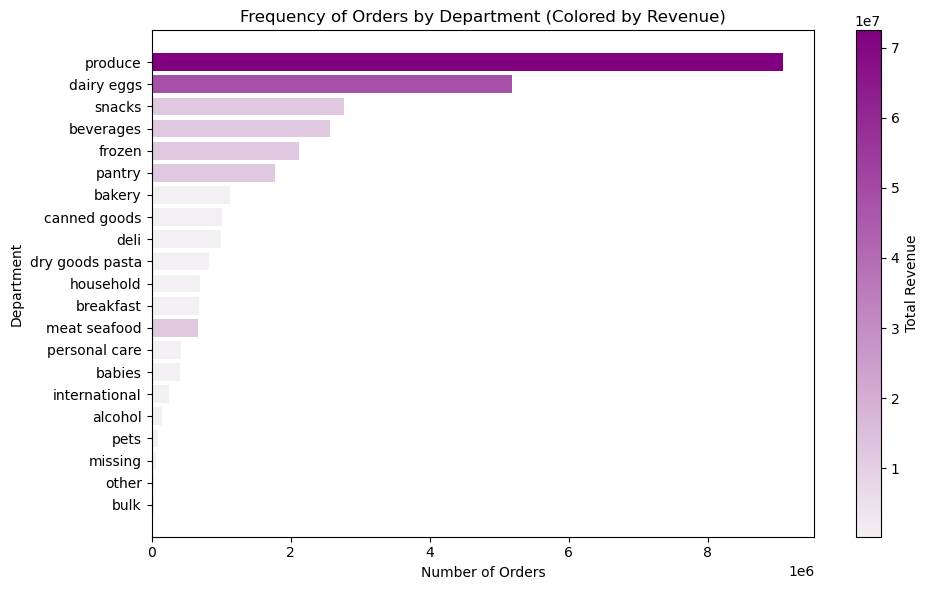

In [73]:
# Group by department_id and count orders
department_counts = opc_df.groupby('department_id')['order_id'].size()

# Calculate the total revenue per department_id
department_revenue_color = opc_df.groupby('department_id')['prices'].sum()

# Sort by count of orders (ascending by default)
department_counts = department_counts.sort_values()

# Get the department names
department_names = opc_df.groupby('department_id')['department'].first().loc[department_counts.index]

# Normalize revenue values to create 7 equal bins
revenue_bins = pd.cut(department_revenue_color, bins=7, labels=False)

# Create a custom orange palette for color mapping
cmap = sns.light_palette("purple", as_cmap=True)

# Map revenue to color
bar_colors = [cmap(bin_val / 6) for bin_val in revenue_bins.loc[department_counts.index]]

# Plot the results as a horizontal bar chart
deptfig_1, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(department_names, department_counts, color=bar_colors)

# Customize the plot
plt.title('Frequency of Orders by Department (Colored by Revenue)')
plt.xlabel('Number of Orders')
plt.ylabel('Department')

# Add a color bar for revenue
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=department_revenue_color.min(), vmax=department_revenue_color.max()))
sm.set_array([])
cbar = deptfig_1.colorbar(sm, ax=ax)
cbar.set_label('Total Revenue')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [75]:
# Save the plot 
save_path = os.path.join(path, '04 Analysis', 'Viz', 'barchart_dept_general.png')
os.makedirs(os.path.dirname(save_path), exist_ok=True)
deptfig_1.get_figure().savefig(save_path, format='png', dpi=300)

# Print confirmation
print(f"Plot saved to {save_path}")

Plot saved to /Users/amyzhang/Desktop/Instacart Basket Analysis/04 Analysis/Viz/barchart_dept_general.png


# 7) Revenue per Order: Top Value-Generating Departments (Slide 13)

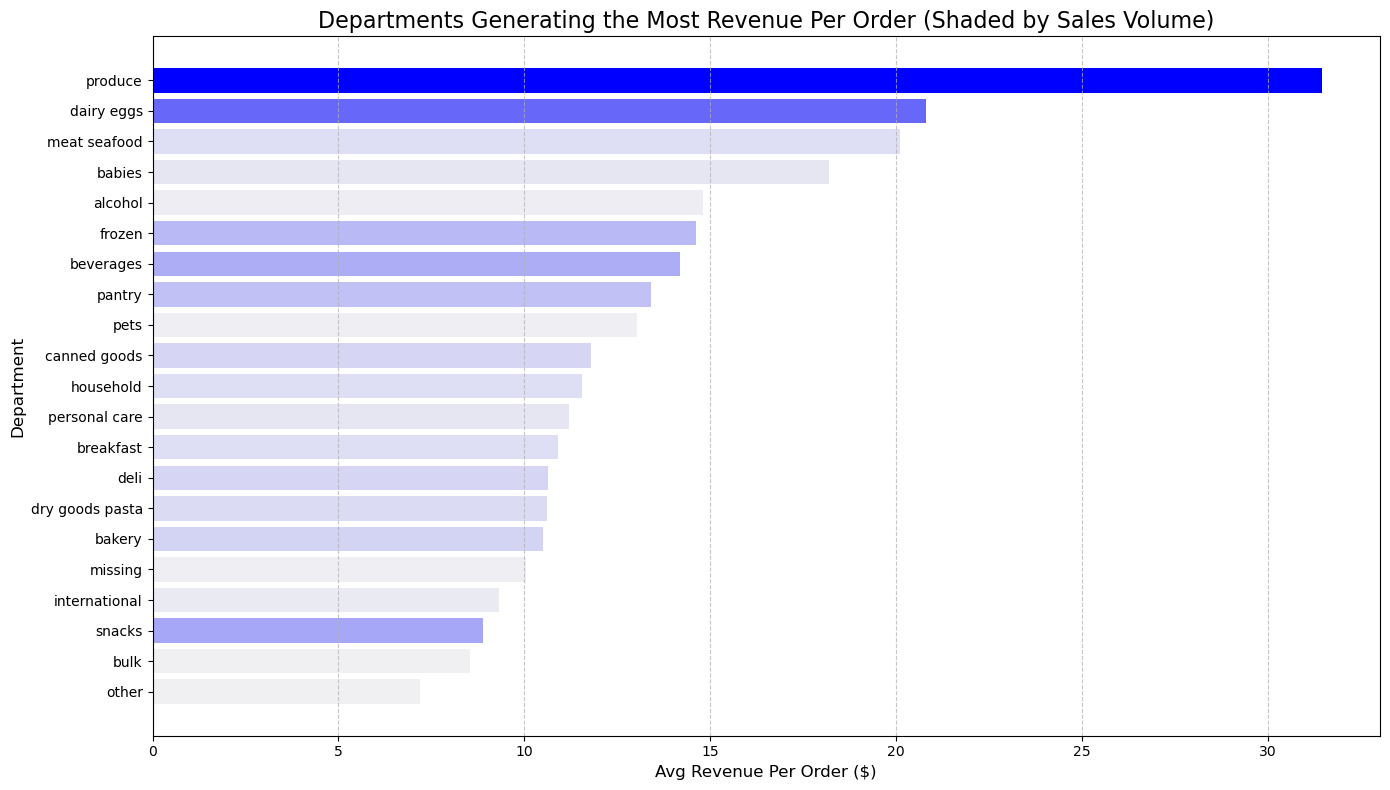

In [79]:
# Step 1: Group by 'department' and calculate total revenue, unique orders, and product count
department_revenue_data = (
    opc_df.groupby('department')
    .agg(
        total_revenue=('prices', 'sum'),  # Total revenue from prices
        total_orders=('order_id', 'nunique'),  # Number of unique orders
        total_sales=('product_id', 'count')  # Total count of product_id (sales volume)
    )
    .reset_index()
)

# Step 2: Calculate revenue per order
department_revenue_data['revenue_per_order'] = (
    department_revenue_data['total_revenue'] / department_revenue_data['total_orders']
)

# Step 3: Sort the data by revenue per order in descending order
department_revenue_data = department_revenue_data.sort_values(by='revenue_per_order', ascending=False)

# Step 4: Normalize the 'total_sales' for color mapping
department_revenue_data['sales_normalized'] = department_revenue_data['total_sales'] / department_revenue_data['total_sales'].max()

# Step 5: Create the bar chart
dept_avg_rev = plt.figure(figsize=(14, 8))
bars = plt.barh(
    department_revenue_data['department'], 
    department_revenue_data['revenue_per_order'], 
    color=sns.light_palette("blue", as_cmap=True)(department_revenue_data['sales_normalized'])
)

# Step 6: Customize the plot
plt.title('Departments Generating the Most Revenue Per Order (Shaded by Sales Volume)', fontsize=16)
plt.xlabel('Avg Revenue Per Order ($)', fontsize=12)
plt.ylabel('Department', fontsize=12)
plt.gca().invert_yaxis()  # Ensure highest revenue is at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [82]:
# Save the plot 
save_path = os.path.join(path, '04 Analysis', 'Viz', 'Dept_avg_rev.png')
os.makedirs(os.path.dirname(save_path), exist_ok=True)
dept_avg_rev.get_figure().savefig(save_path, format='png', dpi=300)

# Print confirmation
print(f"Plot saved to {save_path}")

Plot saved to /Users/amyzhang/Desktop/Instacart Basket Analysis/04 Analysis/Viz/Dept_avg_rev.png


# 8) Departments ranked by Reorder Frequency (Slide 14) 

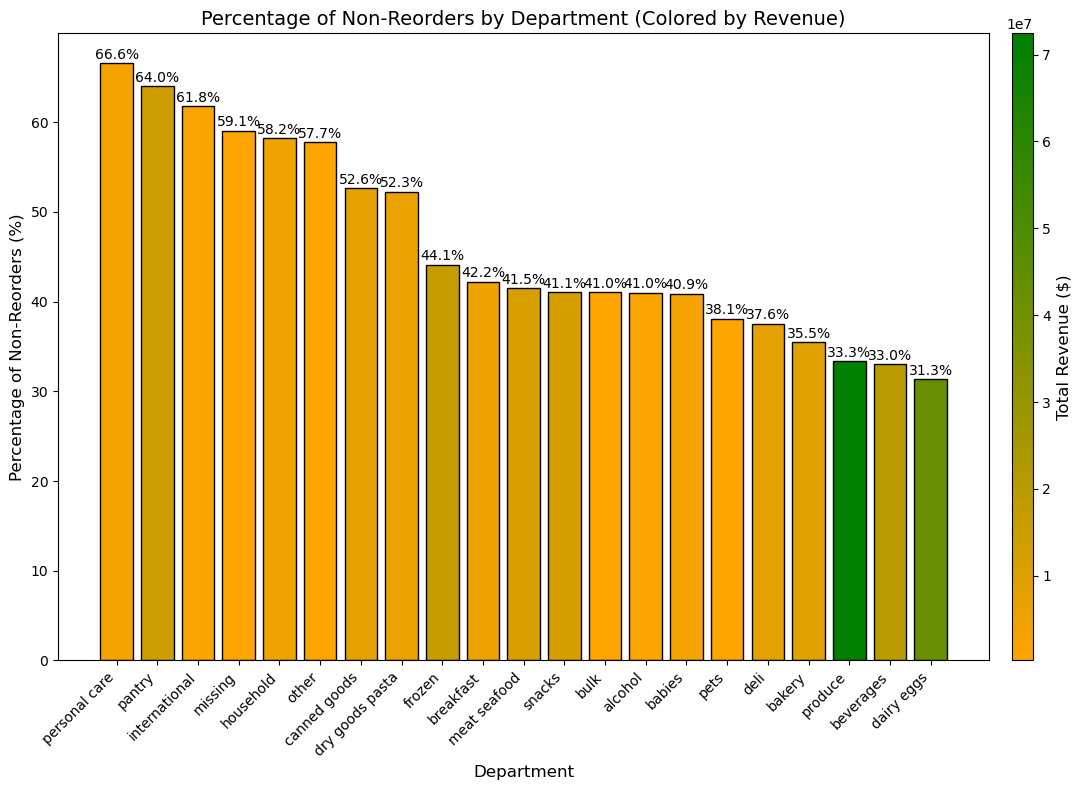

In [86]:
from matplotlib.colors import LinearSegmentedColormap

# Calculate total orders and non-reorder orders for each department
total_orders = opc_df.groupby('department')['product_id'].count()
non_reorder_orders = opc_df[opc_df['reorder_status'] == 0].groupby('department')['product_id'].count()

# Calculate total revenue for each department
total_revenue = opc_df.groupby('department')['prices'].sum()

# Normalize: Calculate the percentage of non-reorders
non_reorder_percentage = (non_reorder_orders / total_orders) * 100
non_reorder_percentage = non_reorder_percentage.dropna()  # Drop NaN values

# Sort by the percentage of non-reorders in descending order
non_reorder_percentage_sorted = non_reorder_percentage.sort_values(ascending=False)

# Normalize revenue for color intensity (0 to 1 range)
normalized_revenue = total_revenue[non_reorder_percentage_sorted.index]  # Align with sorted departments
normalized_revenue = (normalized_revenue - normalized_revenue.min()) / (normalized_revenue.max() - normalized_revenue.min())

# Generate color mapping based on normalized revenue
colors_list = ['orange', 'green']
cmap = LinearSegmentedColormap.from_list("OrangeGreen", colors_list)
colors = cmap(normalized_revenue)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(
    non_reorder_percentage_sorted.index, 
    non_reorder_percentage_sorted.values, 
    color=colors, 
    edgecolor='black'
)

# Add labels and title
ax.set_xlabel('Department', fontsize=12)
ax.set_ylabel('Percentage of Non-Reorders (%)', fontsize=12)
ax.set_title('Percentage of Non-Reorders by Department (Colored by Revenue)', fontsize=14)
ax.set_xticks(range(len(non_reorder_percentage_sorted.index)))
ax.set_xticklabels(non_reorder_percentage_sorted.index, rotation=45, ha='right')

# Add color bar legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=total_revenue.min(), vmax=total_revenue.max()))
sm.set_array([])  # Needed to initialize ScalarMappable
cbar = fig.colorbar(sm, ax=ax, aspect=30, pad=0.02)
cbar.set_label('Total Revenue ($)', fontsize=12)

# Add annotations for bars
for bar, value in zip(bars, non_reorder_percentage_sorted.values):
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() + 0.5,  # Slightly above the bar
        f'{value:.1f}%', 
        ha='center', 
        fontsize=10
    )

plt.tight_layout()
plt.show()


In [91]:
# Save the plot 
save_path = os.path.join(path, '04 Analysis', 'Viz', 'BAR_dept_nonreorder.png')
os.makedirs(os.path.dirname(save_path), exist_ok=True)
fig.get_figure().savefig(save_path, format='png', dpi=300)

# Print confirmation
print(f"Plot saved to {save_path}")

Plot saved to /Users/amyzhang/Desktop/Instacart Basket Analysis/04 Analysis/Viz/BAR_dept_nonreorder.png


# 9) Reorder Profile v. Customer Loyalty; Reorder Profile v. Customer Frequency (Slide 15)

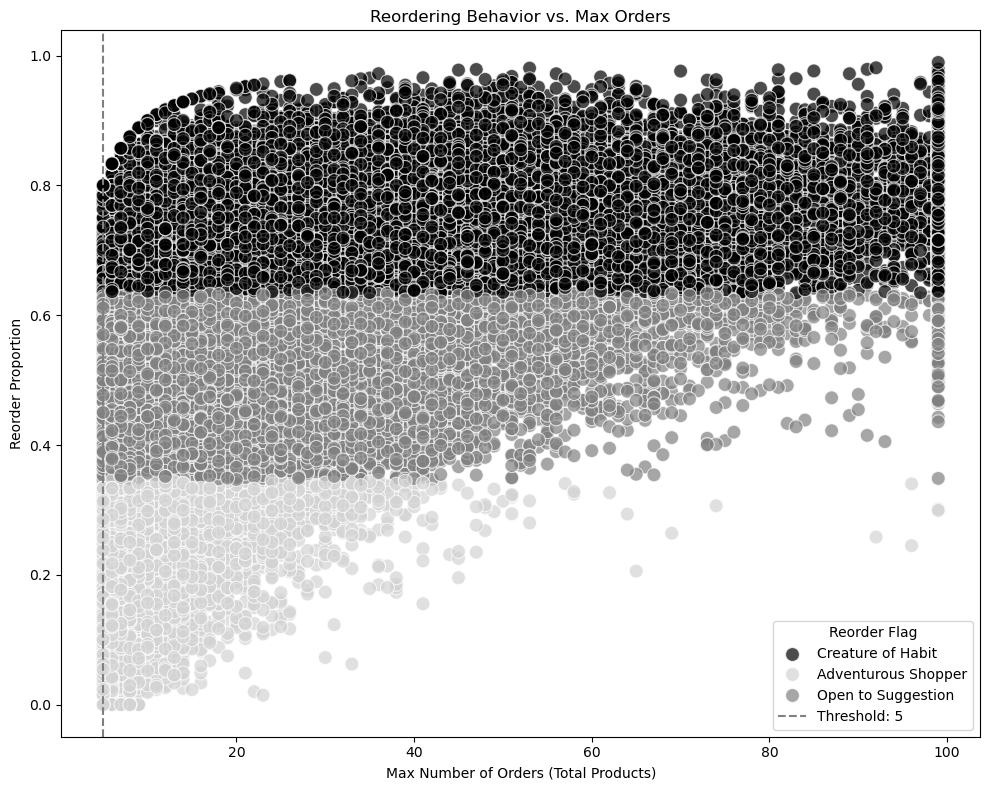

In [93]:
# Define the threshold value (adjust as needed)
threshold_value = 5  # Example threshold value

# Define a grayscale palette for the reorder_flag categories
grayscale_palette = {
    'Adventurous Shopper': '#D3D3D3',  # Light gray
    'Creature of Habit': '#000000',    # Black
    'Open to Suggestion': '#808080',    # Medium gray
}

# Create a figure object
fig_boo, ax = plt.subplots(figsize=(10, 8))

# Create a scatter plot of max number of orders vs. reorder proportion
sns.scatterplot(data=customer_df, 
                x='max_order', 
                y='reorder_proportion', 
                hue='reorder_flag', 
                palette=grayscale_palette,  # Apply the updated palette
                alpha=0.7, 
                s=100, ax=ax)  # Assign to ax (ax is part of the figure object)

# Add a line for the possible threshold (e.g., a cutoff for habit formation)
ax.axvline(x=threshold_value, color='gray', linestyle='--', label=f"Threshold: {threshold_value}")

# Set labels and title
ax.set_xlabel('Max Number of Orders (Total Products)')
ax.set_ylabel('Reorder Proportion')
ax.set_title('Reordering Behavior vs. Max Orders')

# Show the legend
ax.legend(title='Reorder Flag')

# Tight layout for better spacing
plt.tight_layout()


In [95]:
# Save the plot 
save_path = os.path.join(path, '04 Analysis', 'Viz', 'Scatter_ReorderHabit_1.png')
os.makedirs(os.path.dirname(save_path), exist_ok=True)
fig_boo.savefig(save_path, format='png', dpi=300)

# Print confirmation
print(f"Plot saved to {save_path}")

Plot saved to /Users/amyzhang/Desktop/Instacart Basket Analysis/04 Analysis/Viz/Scatter_ReorderHabit_1.png


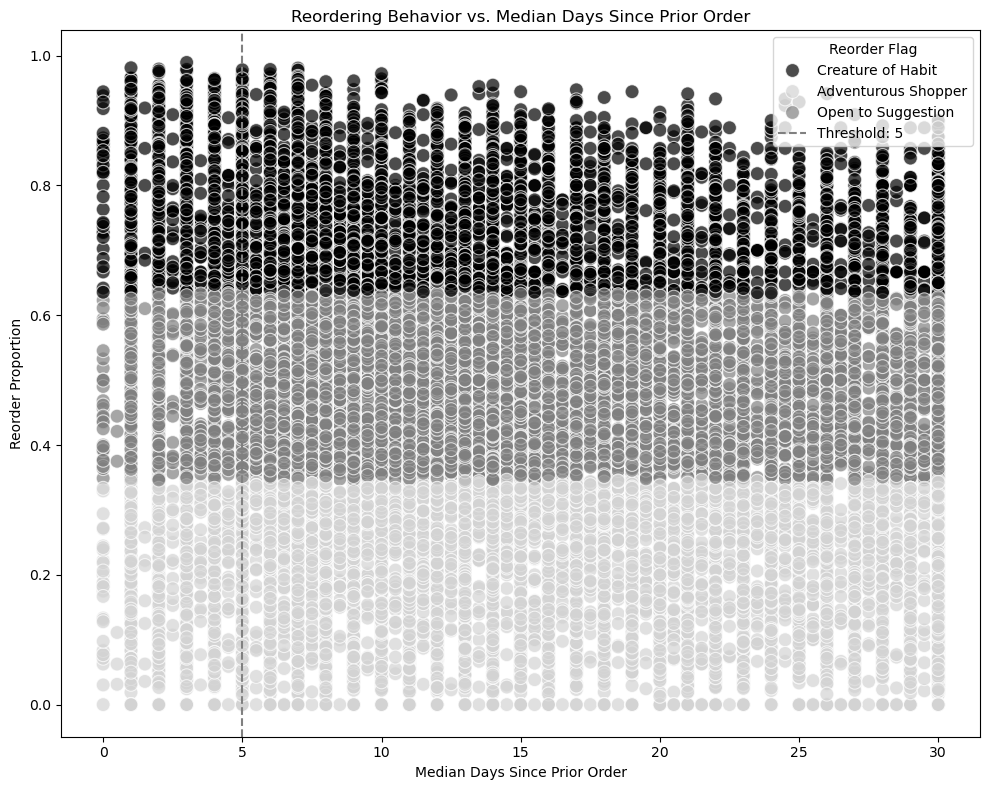

In [98]:
# Define a grayscale palette for the reorder_flag categories
grayscale_palette = {
    'Adventurous Shopper': '#D3D3D3',  # Light gray
    'Creature of Habit': '#000000',    # Black
    'Open to Suggestion': '#808080'    # Medium gray
}

# Define the threshold value (adjust as needed)
threshold_value = 5  # Example threshold value for median days since prior order

# Create a figure object
fig_8, ax = plt.subplots(figsize=(10, 8))

# Create the scatter plot of median_days_since_prior_order vs reorder_proportion
sns.scatterplot(data=customer_df, 
                x='median_days_since_prior_order', 
                y='reorder_proportion', 
                hue='reorder_flag', 
                palette=grayscale_palette,  # Apply the grayscale palette
                alpha=0.7, 
                s=100, ax=ax)  # Assign to ax (ax is part of the figure object)

# Add a line for the possible threshold (e.g., a cutoff for habit formation)
ax.axvline(x=threshold_value, color='gray', linestyle='--', label=f"Threshold: {threshold_value}")

# Set labels and title
ax.set_xlabel('Median Days Since Prior Order')
ax.set_ylabel('Reorder Proportion')
ax.set_title('Reordering Behavior vs. Median Days Since Prior Order')

# Show the legend
ax.legend(title='Reorder Flag')

# Tight layout for better spacing
plt.tight_layout()

In [100]:
# Save the plot to a variable
save_path = os.path.join(path, '04 Analysis', 'Viz', 'Scatter_ReorderBehavior_MedianDays.png')
os.makedirs(os.path.dirname(save_path), exist_ok=True)
fig_8.savefig(save_path, format='png', dpi=300)

# Print confirmation
print(f"Plot saved to {save_path}")

Plot saved to /Users/amyzhang/Desktop/Instacart Basket Analysis/04 Analysis/Viz/Scatter_ReorderBehavior_MedianDays.png


# 10) Boxplots: Nonreorder Behavior and Shopping Hours (Slide 16)

/var/folders/6r/kznwmt6j1rsfwtfplchqpwj00000gn/T/ipykernel_58748/2182186539.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=customer_df,


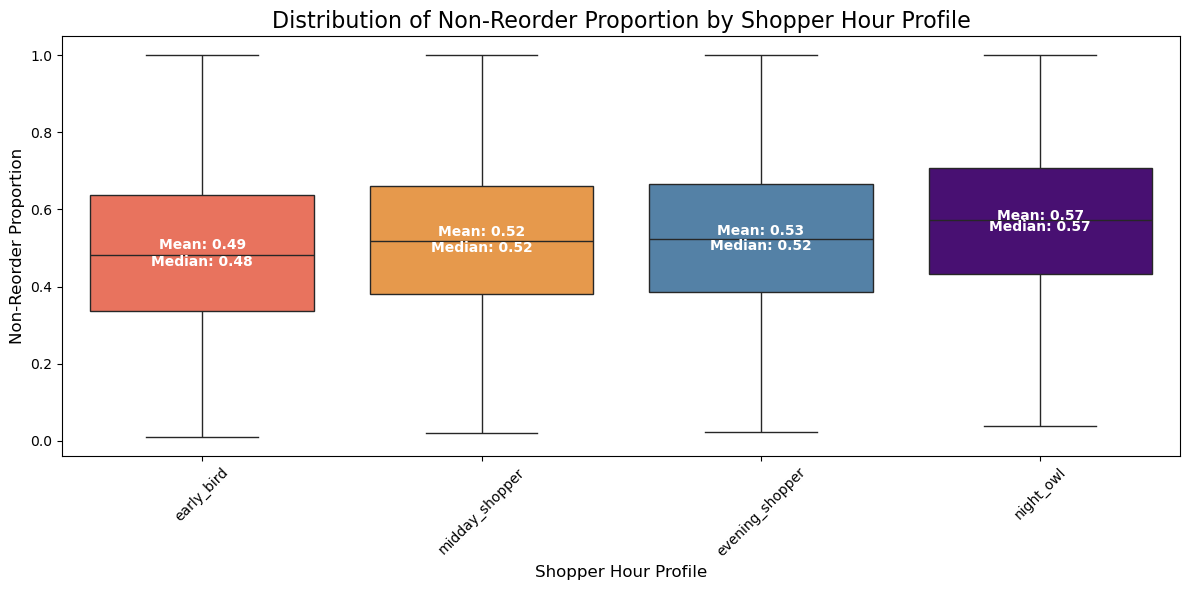

In [105]:
# Define your custom color map
color_map = {
    'early_bird': '#FF6347',       # Warm red-orange tone
    'midday_shopper': '#FF9933',   # Warm yellow-orange tone
    'evening_shopper': '#4682B4',  # Lighter steel blue tone
    'night_owl': '#4B0082'         # Cool indigo tone
}

# Create a new column for non-reorder proportion
customer_df['non_reorder_proportion'] = 1 - customer_df['reorder_proportion']

# Create the boxplot with the custom color map
non_reorder_box = plt.figure(figsize=(12, 6))  # Adjust the size as needed
ax = sns.boxplot(data=customer_df, 
                 x='shopper_hour_profile', 
                 y='non_reorder_proportion', 
                 palette=color_map)

# Add labels for the mean and median
for i, profile in enumerate(customer_df['shopper_hour_profile'].unique()):
    # Filter the data for the specific shopper profile
    profile_data = customer_df[customer_df['shopper_hour_profile'] == profile]['non_reorder_proportion']
    
    # Calculate mean and median
    mean_value = np.mean(profile_data)
    median_value = np.median(profile_data)
    
    # Add the mean and median text on the plot
    ax.text(i, mean_value, f'Mean: {mean_value:.2f}', color='white', ha='center', va='bottom', fontsize=10, fontweight='bold')
    ax.text(i, median_value, f'Median: {median_value:.2f}', color='white', ha='center', va='top', fontsize=10, fontweight='bold')

# Add labels and a title
plt.title('Distribution of Non-Reorder Proportion by Shopper Hour Profile', fontsize=16)
plt.xlabel('Shopper Hour Profile', fontsize=12)
plt.ylabel('Non-Reorder Proportion', fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [108]:
# Save the plot 
save_path = os.path.join(path, '04 Analysis', 'Viz', 'nonreorder_boxpl.png')
os.makedirs(os.path.dirname(save_path), exist_ok=True)
non_reorder_box.get_figure().savefig(save_path, format='png', dpi=300)

# Print confirmation
print(f"Plot saved to {save_path}")

Plot saved to /Users/amyzhang/Desktop/Instacart Basket Analysis/04 Analysis/Viz/nonreorder_boxpl.png


# 11) Heatmap: Department Rankings across various metrics (Slides 17, 18, 19)

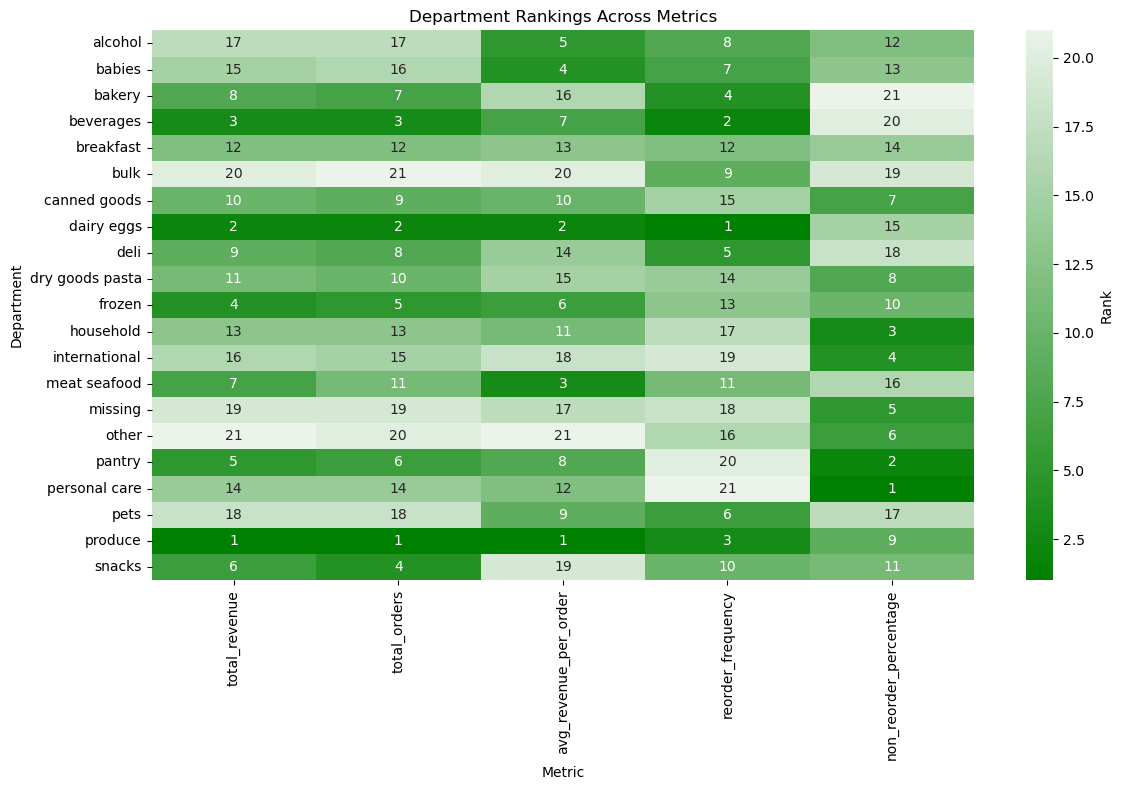

In [112]:
# Step 1: Calculate metrics for each department
# Total revenue
total_revenue = opc_df.groupby('department_id')['prices'].sum()

# Total unique orders
total_orders = opc_df.groupby('department_id')['order_id'].nunique()

# Average revenue per order
avg_revenue_per_order = total_revenue / total_orders

# Reorder frequency (proportion of reorders)
reorder_frequency = opc_df.groupby('department_id')['reorder_status'].mean()

# Non-reorder percentage
non_reorders = opc_df[opc_df['reorder_status'] == 0].groupby('department_id')['order_id'].nunique()
non_reorder_percentage = (non_reorders / total_orders) * 100

# Combine all metrics into a single DataFrame
metrics = pd.DataFrame({
    'total_revenue': total_revenue,
    'total_orders': total_orders,
    'avg_revenue_per_order': avg_revenue_per_order,
    'reorder_frequency': reorder_frequency,
    'non_reorder_percentage': non_reorder_percentage
})

# Step 2: Rank departments for each metric (1 = highest rank)
rankings = metrics.rank(ascending=False)

# Step 3: Prepare for heatmap
rankings = rankings.reset_index()  # Add department_id as a column
department_names = opc_df.groupby('department_id')['department'].first()
rankings['department_name'] = rankings['department_id'].map(department_names)
rankings = rankings.set_index('department_name').drop('department_id', axis=1)  # Set department_name as index

# Sort departments alphabetically by name
rankings = rankings.sort_index()

# Step 4: Create the heatmap with a reversed green palette
dept_ranking_heatmap = plt.figure(figsize=(12, 8))
sns.heatmap(
    rankings, 
    annot=True, 
    cmap=sns.light_palette("green", as_cmap=True, reverse=True),  # Reverse green palette
    cbar_kws={'label': 'Rank'}, 
    fmt='.0f'
)

# Customize the plot
plt.title('Department Rankings Across Metrics')
plt.xlabel('Metric')
plt.ylabel('Department')

# Show the plot
plt.tight_layout()
plt.show()


In [116]:
# Save the plot 
save_path = os.path.join(path, '04 Analysis', 'Viz', 'Dept_Rank_Heatmap.png')
os.makedirs(os.path.dirname(save_path), exist_ok=True)
dept_ranking_heatmap.get_figure().savefig(save_path, format='png', dpi=300)

# Print confirmation
print(f"Plot saved to {save_path}")

Plot saved to /Users/amyzhang/Desktop/Instacart Basket Analysis/04 Analysis/Viz/Dept_Rank_Heatmap.png


# 12) Heatmap: Department Index (Slides 20 & 21) 

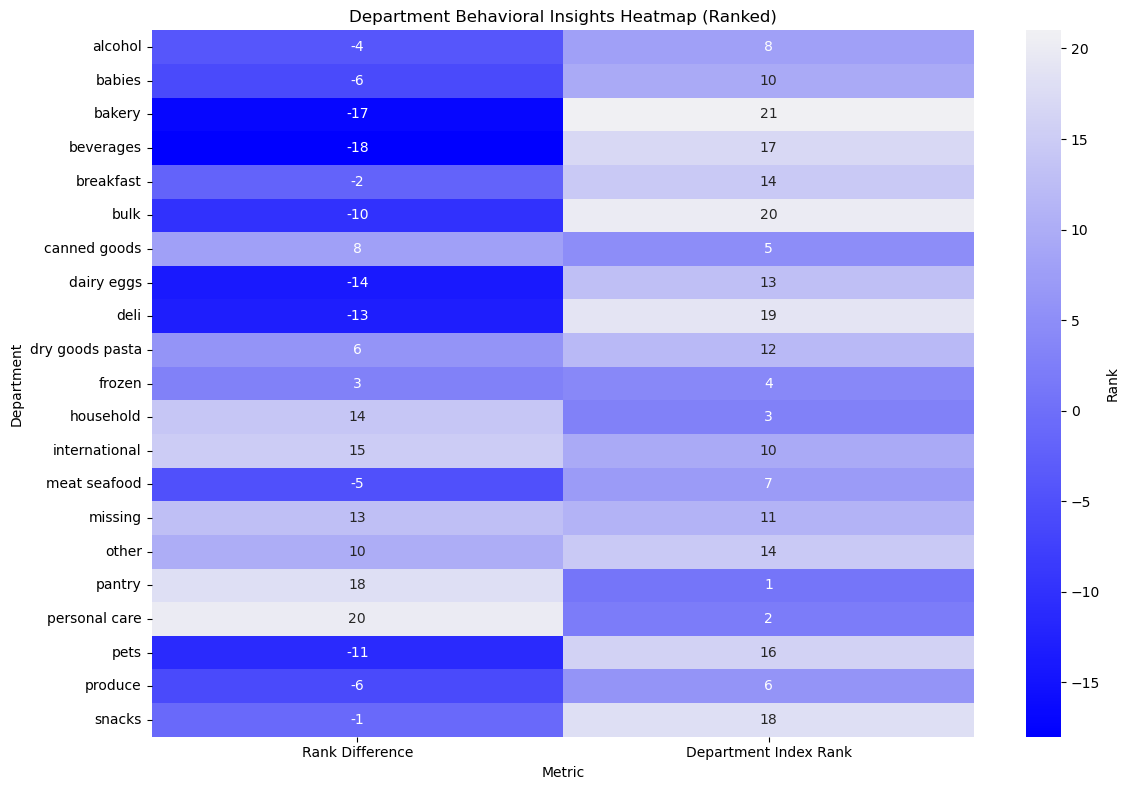

In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate metrics for each department
# Total revenue
total_revenue = opc_df.groupby('department_id')['prices'].sum()

# Total unique orders
total_orders = opc_df.groupby('department_id')['order_id'].nunique()

# Average revenue per order
avg_revenue_per_order = total_revenue / total_orders

# Reorder frequency (proportion of reorders)
reorder_frequency = opc_df.groupby('department_id')['reorder_status'].mean()

# Non-reorder percentage
non_reorders = opc_df[opc_df['reorder_status'] == 0].groupby('department_id')['order_id'].nunique()
non_reorder_percentage = (non_reorders / total_orders) * 100

# Combine all metrics into a single DataFrame
metrics = pd.DataFrame({
    'total_revenue': total_revenue,
    'total_orders': total_orders,
    'avg_revenue_per_order': avg_revenue_per_order,
    'reorder_frequency': reorder_frequency,
    'non_reorder_percentage': non_reorder_percentage
})

# Step 2: Rank departments for each metric (1 = highest rank)
rankings = metrics.rank(ascending=False)

# Invert the rank for average revenue per order (higher revenue = lower rank)
rankings['avg_revenue_per_order_rank'] = metrics['avg_revenue_per_order'].rank(ascending=True)

# Add Rank Difference
rankings['Rank Difference'] = rankings['reorder_frequency'] - rankings['non_reorder_percentage']

# Step 3: Calculate Weighted Index
# Assign weights (adjust W1 and W2 as needed)
W1 = 1.5  # Weight for Average Revenue per Order
W2 = 1.0  # Weight for Rank Difference

rankings['Department Index'] = (
    rankings['avg_revenue_per_order_rank'] * W1 +  # Now using the inverted revenue rank
    rankings['Rank Difference'] * W2
)

# Calculate the rank of the Department Index
rankings['Department Index Rank'] = rankings['Department Index'].rank(ascending=False)

# Step 4: Prepare for visualization
rankings = rankings.reset_index()  # Add department_id as a column
department_names = opc_df.groupby('department_id')['department'].first()
rankings['department_name'] = rankings['department_id'].map(department_names)
rankings = rankings.set_index('department_name').drop('department_id', axis=1)  # Set department_name as index

# Sort departments alphabetically by name
rankings = rankings.sort_index()

# Step 5: Create the heatmap with ranks instead of raw values
dept_ranking_heatmap_5 = plt.figure(figsize=(12, 8))
sns.heatmap(
    rankings[['Rank Difference', 'Department Index Rank']],  # Use rank for Department Index
    annot=True, 
    cmap=sns.light_palette("blue", as_cmap=True, reverse=True),  # Reverse green palette
    cbar_kws={'label': 'Rank'}, 
    fmt='.0f'
)

# Customize the plot
plt.title('Department Behavioral Insights Heatmap (Ranked)')
plt.xlabel('Metric')
plt.ylabel('Department')

# Show the plot
plt.tight_layout()
plt.show()


In [123]:
# Save the plot 
save_path = os.path.join(path, '04 Analysis', 'Viz', 'Dept_Rank_Heatmap_5.png')
os.makedirs(os.path.dirname(save_path), exist_ok=True)
dept_ranking_heatmap_5.get_figure().savefig(save_path, format='png', dpi=300)

# Print confirmation
print(f"Plot saved to {save_path}")

Plot saved to /Users/amyzhang/Desktop/Instacart Basket Analysis/04 Analysis/Viz/Dept_Rank_Heatmap_5.png


# 13) Department Share of Instacart Sales Across Time: line graphs (Slide 23)

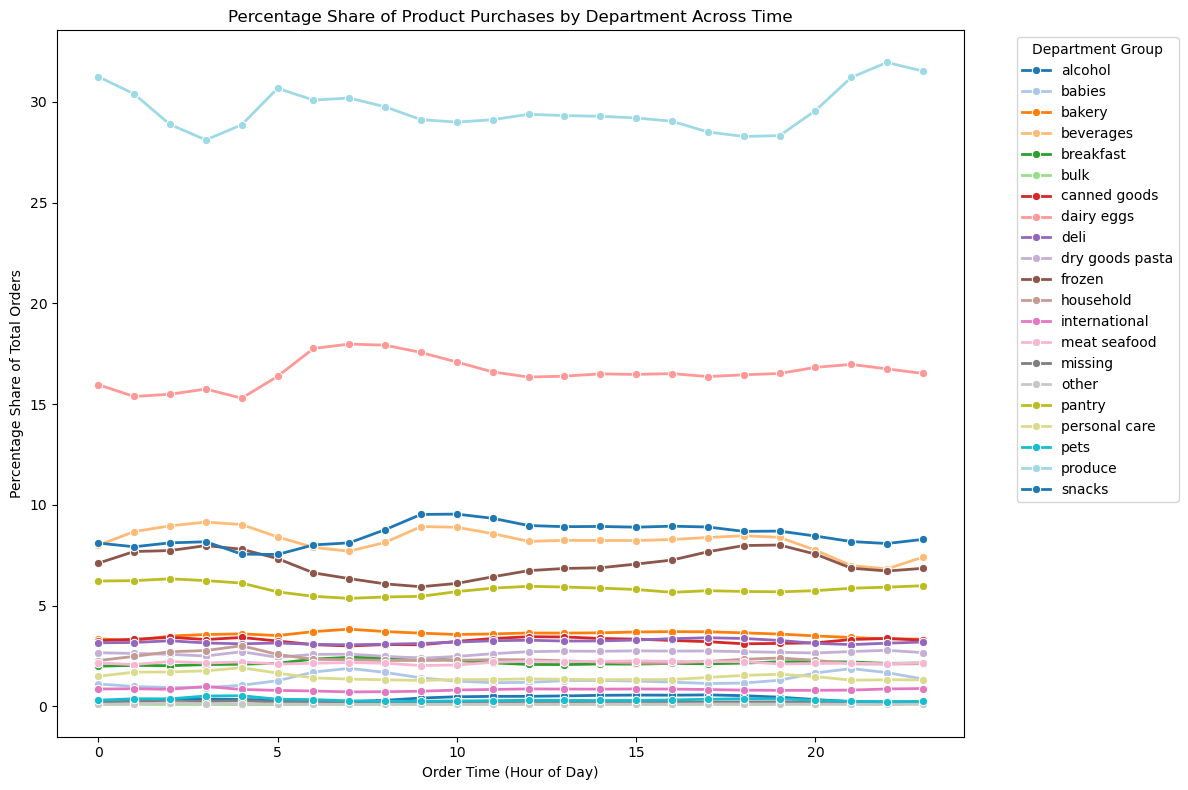

In [127]:
# Filter for all hours (0-23)
all_df = opc_df[opc_df['order_time'].isin(range(24))]

# Group by 'order_time' and 'department_group', and count the 'product_id' for each combination
all_df = all_df.groupby(['order_time', 'department'])['product_id'].count().reset_index()

# Calculate the total product count across all hours and department groups
total_product_count = all_df.groupby('order_time')['product_id'].transform('sum')

# Calculate the percentage share for each department group
all_df['percentage_share'] = (all_df['product_id'] / total_product_count) * 100

# Plotting
all_dept = plt.figure(figsize=(12, 8))

# Use seaborn's lineplot to plot percentage share for each department group over order_time
sns.lineplot(data=all_df, x='order_time', y='percentage_share', hue='department', 
             palette='tab20', marker='o', linestyle='-', linewidth=2)

# Add labels and title
plt.xlabel('Order Time (Hour of Day)')
plt.ylabel('Percentage Share of Total Orders')
plt.title('Percentage Share of Product Purchases by Department Across Time')

# Show legend
plt.legend(title='Department Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [132]:
# Save the plot
save_path = os.path.join(path, '04 Analysis', 'Viz', 'Dept_Proportion_ALLTIME.png')
os.makedirs(os.path.dirname(save_path), exist_ok=True)
all_dept.get_figure().savefig(save_path, format='png', dpi=300)

# Print confirmation
print(f"Plot saved to {save_path}")

Plot saved to /Users/amyzhang/Desktop/Instacart Basket Analysis/04 Analysis/Viz/Dept_Proportion_ALLTIME.png


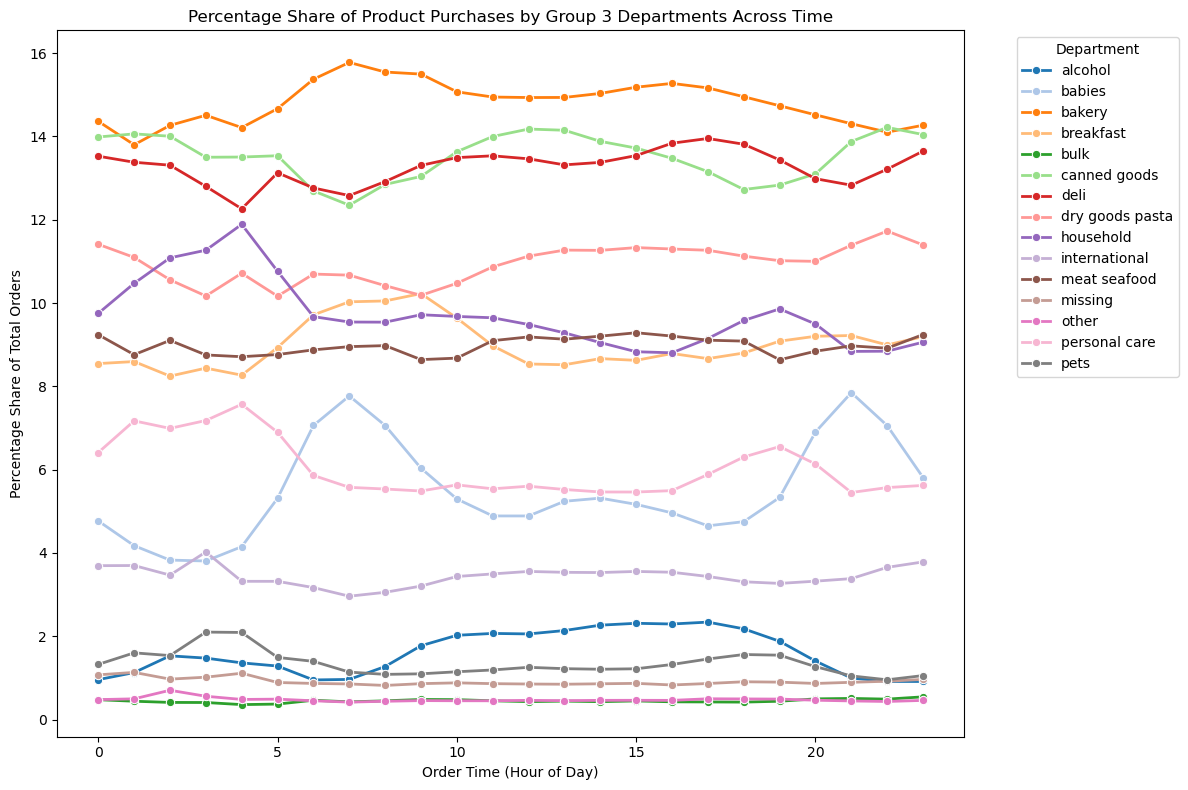

In [134]:
# Define the Group 3 departments
grp_3_depts = [
    'alcohol', 'babies', 'bakery', 'breakfast', 'bulk', 'canned goods', 
    'deli', 'dry goods pasta', 'household', 'international', 
    'meat seafood', 'missing', 'other', 'personal care', 
    'pets'
]

# Filter for all hours (0-23)
all_df = opc_df[opc_df['order_time'].isin(range(24))]

# Include only the Group 3 departments
filtered_df = all_df[all_df['department'].isin(grp_3_depts)]

# Group by 'order_time' and 'department', and count the 'product_id' for each combination
filtered_df = filtered_df.groupby(['order_time', 'department'])['product_id'].count().reset_index()

# Calculate the total product count across all hours
total_product_count = filtered_df.groupby('order_time')['product_id'].transform('sum')

# Calculate the percentage share for each department
filtered_df['percentage_share'] = (filtered_df['product_id'] / total_product_count) * 100

# Plotting
line_grp_3 = plt.figure(figsize=(12, 8))

# Use seaborn's lineplot to plot percentage share for each department over order_time
sns.lineplot(data=filtered_df, x='order_time', y='percentage_share', hue='department', 
             palette='tab20', marker='o', linestyle='-', linewidth=2)

# Add labels and title
plt.xlabel('Order Time (Hour of Day)')
plt.ylabel('Percentage Share of Total Orders')
plt.title('Percentage Share of Product Purchases by Group 3 Departments Across Time')

# Show legend
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [138]:
# Save the plot 
save_path = os.path.join(path, '04 Analysis', 'Viz', 'line_grp_3_time.png')
os.makedirs(os.path.dirname(save_path), exist_ok=True)
line_grp_3.get_figure().savefig(save_path, format='png', dpi=300)

# Print confirmation
print(f"Plot saved to {save_path}")

Plot saved to /Users/amyzhang/Desktop/Instacart Basket Analysis/04 Analysis/Viz/line_grp_3_time.png


# 14) Customer Demographics: Pie Chart for Fam Size & Box Plot for Income (Slide 24)

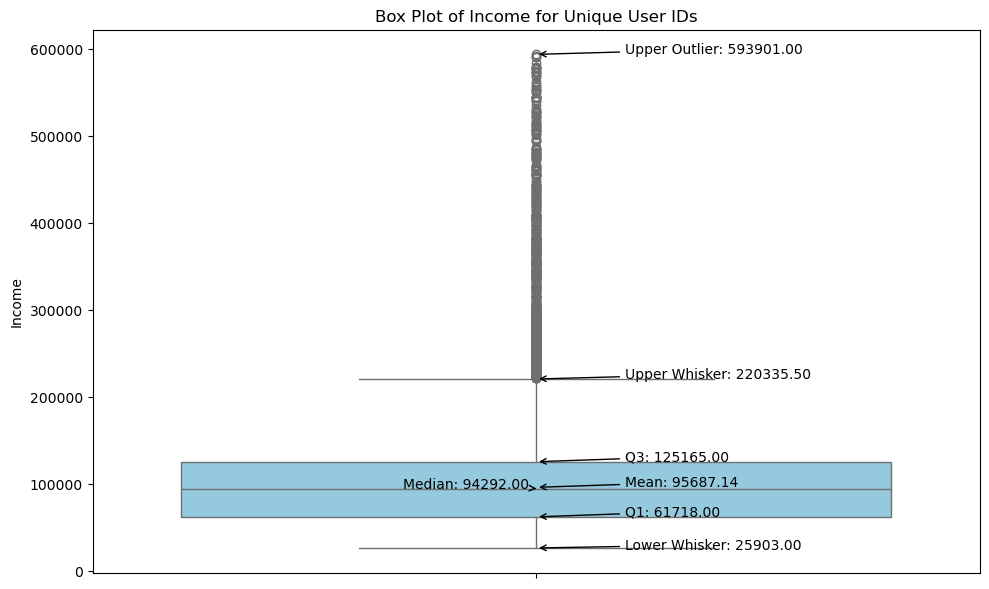

In [140]:
# Step 1: Group by 'user_id' to get unique income values for each user
customer_data_unique = customer_df.groupby('user_id').agg({'income': 'first'}).reset_index()

# Step 2: Create the vertical box plot for income values
income_box = plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=customer_data_unique, y='income', color='skyblue')

# Step 3: Calculate the necessary statistics for annotation
# Get the stats from the box plot itself
stats = customer_data_unique['income'].describe(percentiles=[.25, .5, .75])  # 25%, 50% (median), and 75% quartiles
q1 = stats['25%']
median = stats['50%']
q3 = stats['75%']

# Calculate IQR (Interquartile Range)
iqr = q3 - q1

# Define the lower and upper whiskers
lower_whisker = stats['min']
upper_whisker = q3 + 1.5 * iqr
upper_outlier = stats['max']

# Step 4: Annotate the plot with the quartile values
ax.annotate(f'Mean: {customer_data_unique["income"].mean():.2f}', xy=(0, customer_data_unique["income"].mean()), 
            xytext=(0.1, customer_data_unique["income"].mean() + 1000), arrowprops=dict(arrowstyle="->", lw=1), color='black')

ax.annotate(f'Q1: {q1:.2f}', xy=(0, q1), xytext=(0.1, q1 + 1000), arrowprops=dict(arrowstyle="->", lw=1), color='black')
ax.annotate(f'Median: {median:.2f}', xy=(0, median), xytext=(-0.15, median), arrowprops=dict(arrowstyle="->", lw=1), color='black')
ax.annotate(f'Q3: {q3:.2f}', xy=(0, q3), xytext=(0.1, q3 + 1000), arrowprops=dict(arrowstyle="->", lw=1), color='black')

# Annotating whiskers
ax.annotate(f'Lower Whisker: {lower_whisker:.2f}', xy=(0, lower_whisker), xytext=(0.1, lower_whisker - 1000),
            arrowprops=dict(arrowstyle="->", lw=1), color='black')
ax.annotate(f'Upper Whisker: {upper_whisker:.2f}', xy=(0, upper_whisker), xytext=(0.1, upper_whisker + 1000),
            arrowprops=dict(arrowstyle="->", lw=1), color='black')
ax.annotate(f'Upper Outlier: {upper_outlier:.2f}', xy=(0, upper_outlier), xytext=(0.1, upper_outlier + 1000),
            arrowprops=dict(arrowstyle="->", lw=1), color='black')

# Set the title and labels
plt.title('Box Plot of Income for Unique User IDs')
plt.ylabel('Income')

# Show the plot
plt.tight_layout()
plt.show()


In [143]:
# Save the plot 
save_path = os.path.join(path, '04 Analysis', 'Viz', 'income_boxplot.png')
os.makedirs(os.path.dirname(save_path), exist_ok=True)
income_box.get_figure().savefig(save_path, format='png', dpi=300)

# Print confirmation
print(f"Plot saved to {save_path}")

Plot saved to /Users/amyzhang/Desktop/Instacart Basket Analysis/04 Analysis/Viz/income_boxplot.png


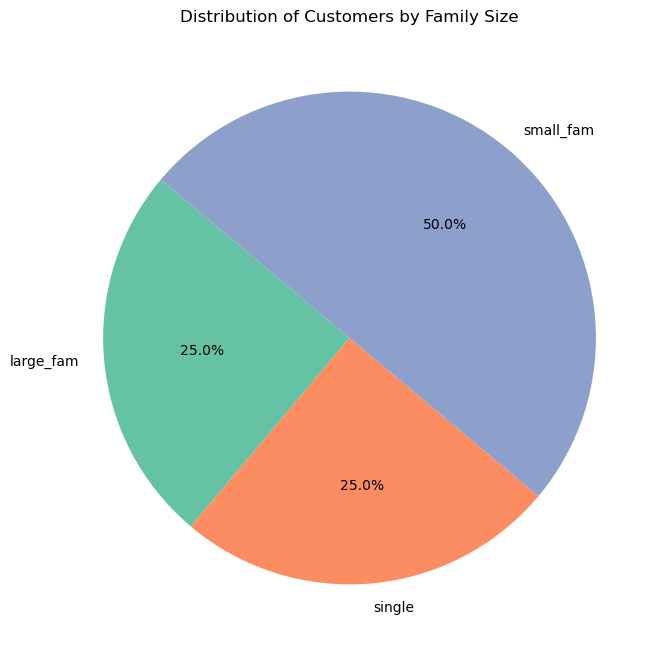

In [146]:
# Group by 'user_id' and count the instances of each 'fam_size'
fam_size_counts = customer_df.groupby('fam_size')['user_id'].nunique()

# Define a color palette
color_map_fam_size = sns.color_palette("Set2", n_colors=len(fam_size_counts))

# Create a pie chart to visualize 'fam_size' distribution
pie_fam_size = plt.figure(figsize=(8, 8))
plt.pie(fam_size_counts, labels=fam_size_counts.index, colors=color_map_fam_size, autopct='%1.1f%%', startangle=140, textprops={'color': 'black'})

# Set the title of the plot
plt.title('Distribution of Customers by Family Size')

# Show the plot
plt.show()


In [149]:
# Save the plot 
save_path = os.path.join(path, '04 Analysis', 'Viz', 'FamSize_Pie.png')
os.makedirs(os.path.dirname(save_path), exist_ok=True)
pie_fam_size.get_figure().savefig(save_path, format='png', dpi=300)

# Print confirmation
print(f"Plot saved to {save_path}")

Plot saved to /Users/amyzhang/Desktop/Instacart Basket Analysis/04 Analysis/Viz/FamSize_Pie.png


# 15) Case Study: Personal Care Dept by Demographic Group (Slide 25)

In [156]:
# Merge opc_df onto merged_df_A to get 'reorder_status' and 'order_time'
merged_df_B = opc_df.merge(customer_df[['user_id', 'demographic_group', 'fam_size', 'income_group']], 
                                 on='user_id', 
                                 how='left')

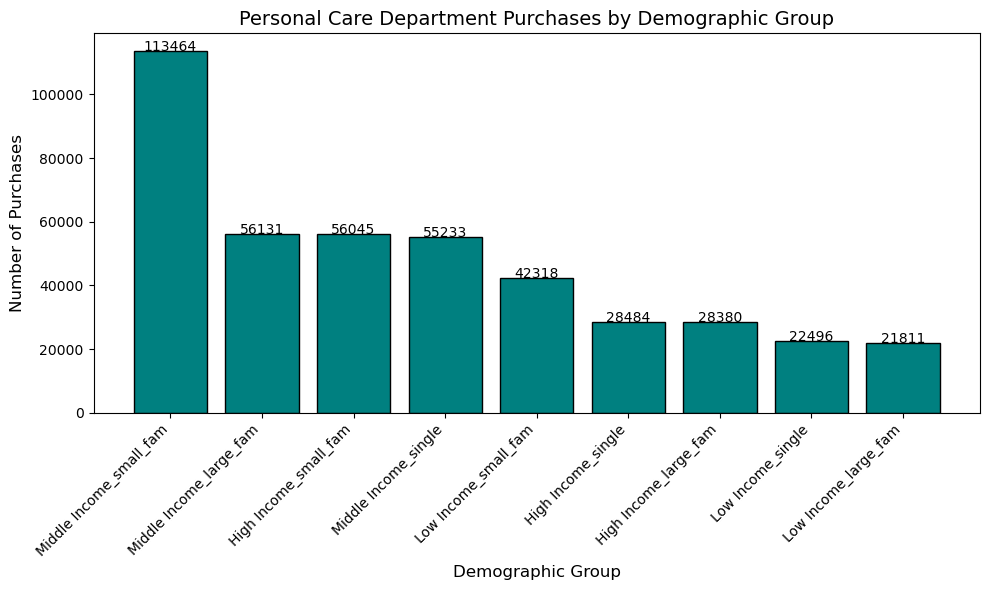

In [158]:
# Filter the data for 'personal care' department
personal_care_df = merged_df_B[merged_df_B['department'] == 'personal care']

# Assuming 'demographic_group' is the column representing the demographic group (e.g., age group, gender)
# Group the data by demographic group and calculate total purchases
demographic_purchases = personal_care_df.groupby('demographic_group')['product_id'].count()

# Alternatively, if you want to sum the prices instead of counts, use:
# demographic_purchases = personal_care_df.groupby('demographic_group')['prices'].sum()

# Sort the result if needed
demographic_purchases_sorted = demographic_purchases.sort_values(ascending=False)

# Plot the distribution by demographic group
personal_care_counts = plt.figure(figsize=(10, 6))
bars = plt.bar(demographic_purchases_sorted.index, demographic_purchases_sorted.values, color='teal', edgecolor='black')

# Add labels and title
plt.xlabel('Demographic Group', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)  # Use 'Total Purchases' for sum of prices
plt.title('Personal Care Department Purchases by Demographic Group', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Optional: Add annotations to bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [161]:
# Save the plot 
save_path = os.path.join(path, '04 Analysis', 'Viz', 'personal_care_counts.png')
os.makedirs(os.path.dirname(save_path), exist_ok=True)
personal_care_counts.get_figure().savefig(save_path, format='png', dpi=300)

# Print confirmation
print(f"Plot saved to {save_path}")

Plot saved to /Users/amyzhang/Desktop/Instacart Basket Analysis/04 Analysis/Viz/personal_care_counts.png


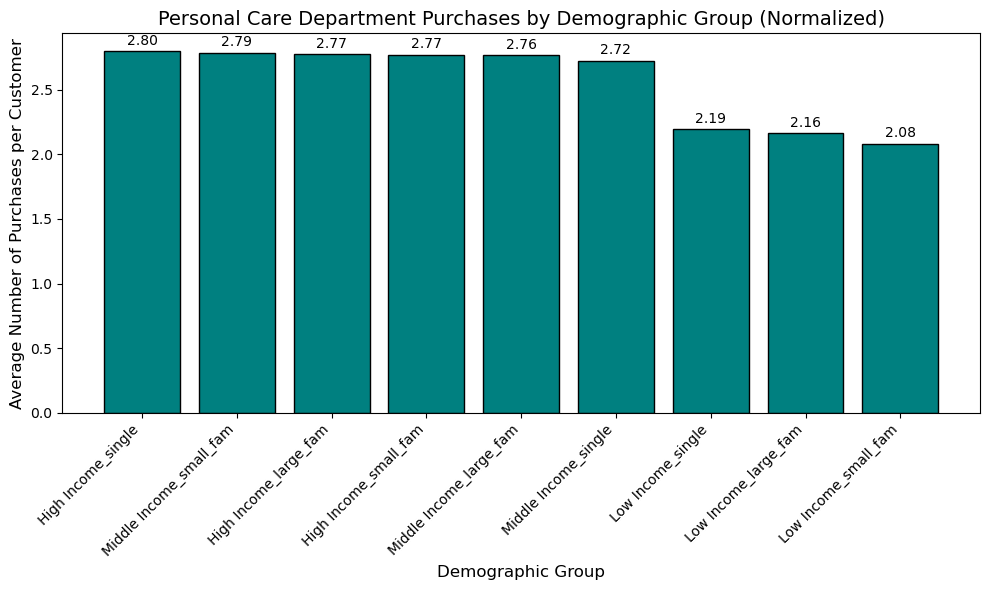

In [164]:
# Filter the data for 'personal care' department (previously completed) 
# Count the number of purchases per demographic group (previously completed)

# Count the total number of customers per demographic group
total_customers = customer_df['demographic_group'].value_counts()

# Normalize the purchases by the total number of customers in each demographic group
normalized_purchases = demographic_purchases / total_customers  # This is now the average number of purchases per customer

# Sort the result if needed
normalized_purchases_sorted = normalized_purchases.sort_values(ascending=False)

# Plot the distribution by demographic group
personal_care_AVG = plt.figure(figsize=(10, 6))
bars = plt.bar(normalized_purchases_sorted.index, normalized_purchases_sorted.values, color='teal', edgecolor='black')

# Add labels and title
plt.xlabel('Demographic Group', fontsize=12)
plt.ylabel('Average Number of Purchases per Customer', fontsize=12)
plt.title('Personal Care Department Purchases by Demographic Group (Normalized)', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Optional: Add annotations to bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.05, f'{height:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [167]:
# Save the plot 
save_path = os.path.join(path, '04 Analysis', 'Viz', 'personal_care_AVG.png')
os.makedirs(os.path.dirname(save_path), exist_ok=True)
personal_care_AVG.get_figure().savefig(save_path, format='png', dpi=300)

# Print confirmation
print(f"Plot saved to {save_path}")

Plot saved to /Users/amyzhang/Desktop/Instacart Basket Analysis/04 Analysis/Viz/personal_care_AVG.png


# 16) Heatmap: Normalized Purchases by Department and Demographic Group (Slide 26)

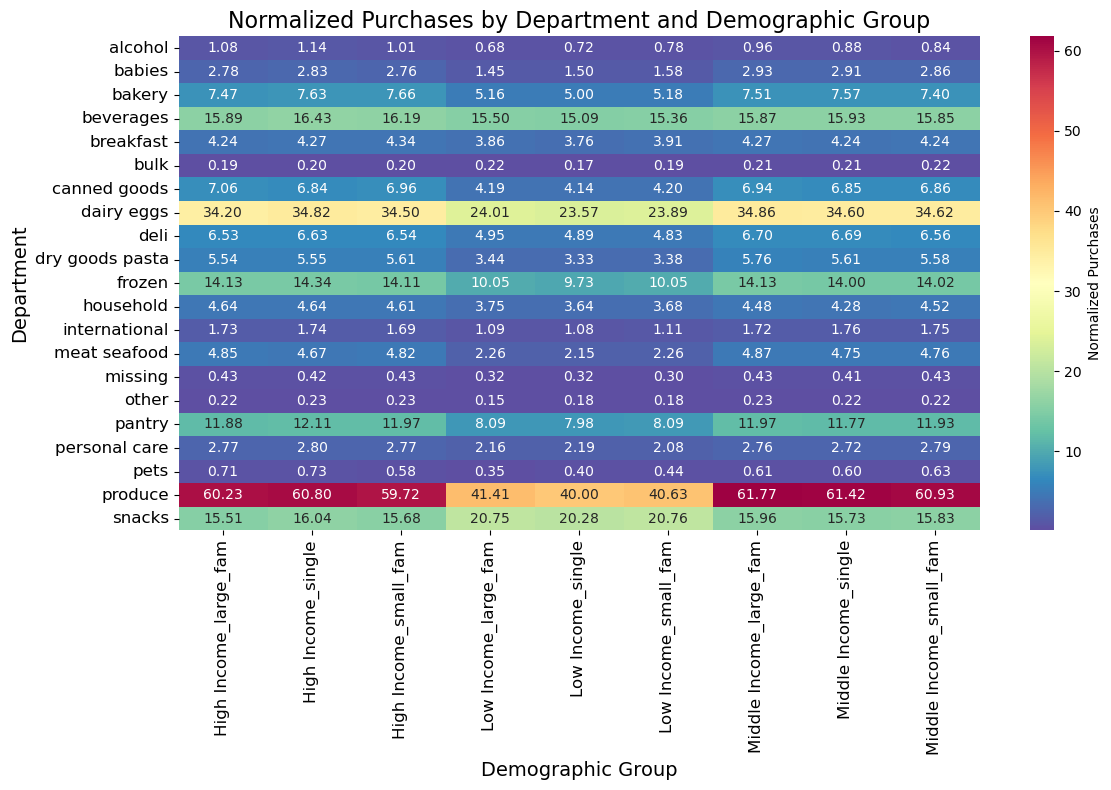

In [176]:
# PART 1: NORMALIZE PURCHASES BY DEMOGRAPHIC GROUP
# Step 1: Group merged_df by department and demographic_group, counting product_id
grouped_df = merged_df_B.groupby(['department', 'demographic_group'])['product_id'].count().reset_index()

# Step 2: Calculate the number of unique users in each demographic_group
user_count = merged_df_B.groupby('demographic_group')['user_id'].nunique().reset_index()
user_count = user_count.rename(columns={'user_id': 'user_count'})  # Rename for clarity

# Step 3: Merge the user count back into grouped_df
grouped_df = grouped_df.merge(user_count, on='demographic_group', how='left')

# Step 4: Normalize the product count by dividing by the number of unique users in the demographic group
grouped_df['normalized_purchases'] = grouped_df['product_id'] / grouped_df['user_count']

# Final grouped_df now contains:
# - department
# - demographic_group
# - product_id (raw count of purchases)
# - user_count (number of unique users in the demographic group)
# - normalized_purchases (normalized product count by user count)

# PART 2: CREATE PIVOT TABLE
# Pivot the grouped_df to create a matrix where rows are departments and columns are demographic groups
pivot_df = grouped_df.pivot(index='department', columns='demographic_group', values='normalized_purchases')

# Replace NaN values with 0 (if any)
pivot_df = pivot_df.fillna(0)


# PART 3: GENERATE HEATMAP
# Create a reversed "Spectral" colormap
rainbow_cmap = sns.color_palette("Spectral_r", as_cmap=True)  # Reversed rainbow gradient

# Plot the heatmap
rainbow_2 = plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_df, 
    annot=True, 
    cmap=rainbow_cmap, 
    fmt='.2f', 
    cbar_kws={'label': 'Normalized Purchases'}
)

# Customize the plot
plt.title('Normalized Purchases by Department and Demographic Group', fontsize=16)
plt.xlabel('Demographic Group', fontsize=14)
plt.ylabel('Department', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [179]:
# Save the plot 
save_path = os.path.join(path, '04 Analysis', 'Viz', 'rainbow_2.png')
os.makedirs(os.path.dirname(save_path), exist_ok=True)
rainbow_2.get_figure().savefig(save_path, format='png', dpi=300)

# Print confirmation
print(f"Plot saved to {save_path}")

Plot saved to /Users/amyzhang/Desktop/Instacart Basket Analysis/04 Analysis/Viz/rainbow_2.png


# 17) Heatmaps: Nonreorder Proportions by Time of Day & Demographic Group

/var/folders/6r/kznwmt6j1rsfwtfplchqpwj00000gn/T/ipykernel_58748/1738676754.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'non_reorder'] = (filtered_data['reorder_status'] == 0).astype(int)


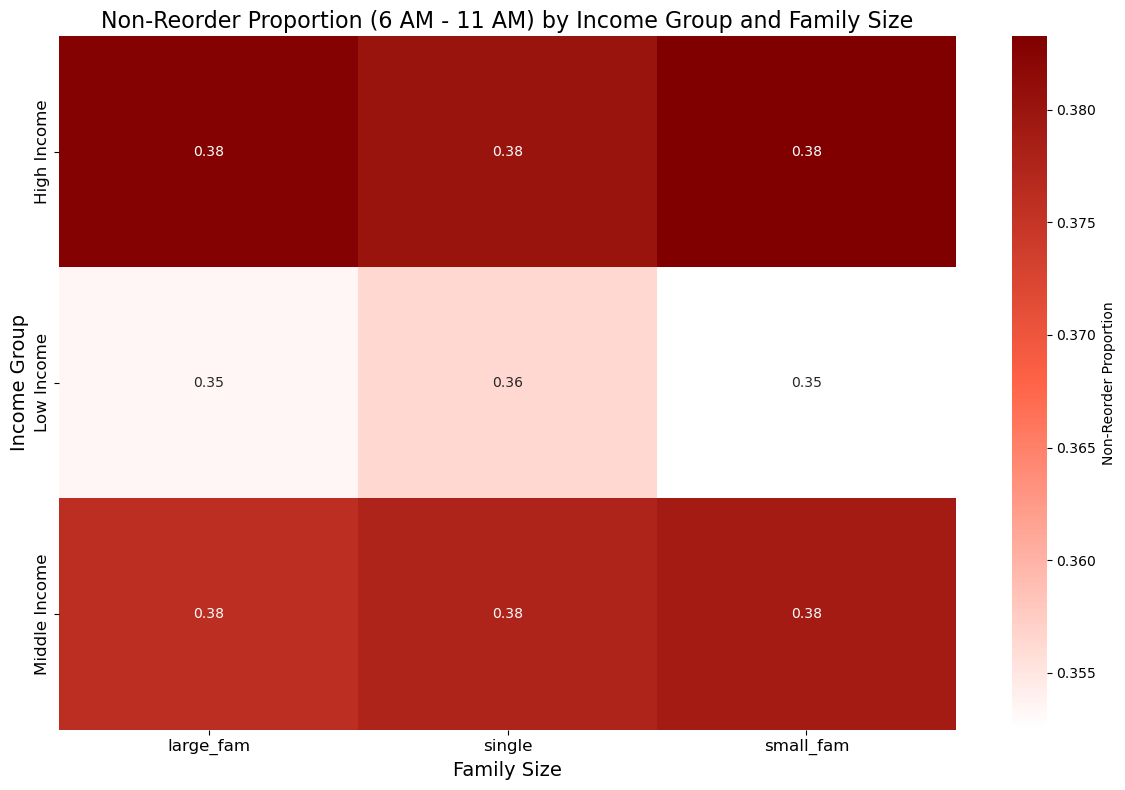

In [183]:
from matplotlib.colors import LinearSegmentedColormap

# Filter for orders between 6 AM and 11 AM
filtered_data = merged_df_B[(merged_df_B['order_time'] >= 6) & (merged_df_B['order_time'] < 12)]

# Safely calculate non-reorder for each row: 1 for non-reorder, 0 for reorder
filtered_data.loc[:, 'non_reorder'] = (filtered_data['reorder_status'] == 0).astype(int)

# Group by 'income_group' and 'fam_size' to calculate the non-reorder proportion
heatmap_data = filtered_data.groupby(['income_group', 'fam_size'])['non_reorder'].mean().reset_index()

# Pivot for the heatmap
pivot_df = heatmap_data.pivot(index='income_group', columns='fam_size', values='non_reorder')

# Create a custom colormap centered around #FF6347
colors = ['#FFFFFF', '#FF6347', '#800000']  # White to Tomato to Dark Red
custom_cmap = LinearSegmentedColormap.from_list('custom_tomato', colors)

# Plot the heatmap
eb_demog = plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap=custom_cmap, fmt='.2f', cbar_kws={'label': 'Non-Reorder Proportion'})

# Customize the plot
plt.title('Non-Reorder Proportion (6 AM - 11 AM) by Income Group and Family Size', fontsize=16)
plt.xlabel('Family Size', fontsize=14)
plt.ylabel('Income Group', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [186]:
# Save the plot 
save_path = os.path.join(path, '04 Analysis', 'Viz', 'DEMOG_eb.png')
os.makedirs(os.path.dirname(save_path), exist_ok=True)
eb_demog.get_figure().savefig(save_path, format='png', dpi=300)

# Print confirmation
print(f"Plot saved to {save_path}")

Plot saved to /Users/amyzhang/Desktop/Instacart Basket Analysis/04 Analysis/Viz/DEMOG_eb.png


/var/folders/6r/kznwmt6j1rsfwtfplchqpwj00000gn/T/ipykernel_58748/1301906186.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['non_reorder'] = (filtered_data['reorder_status'] == 0).astype(int)


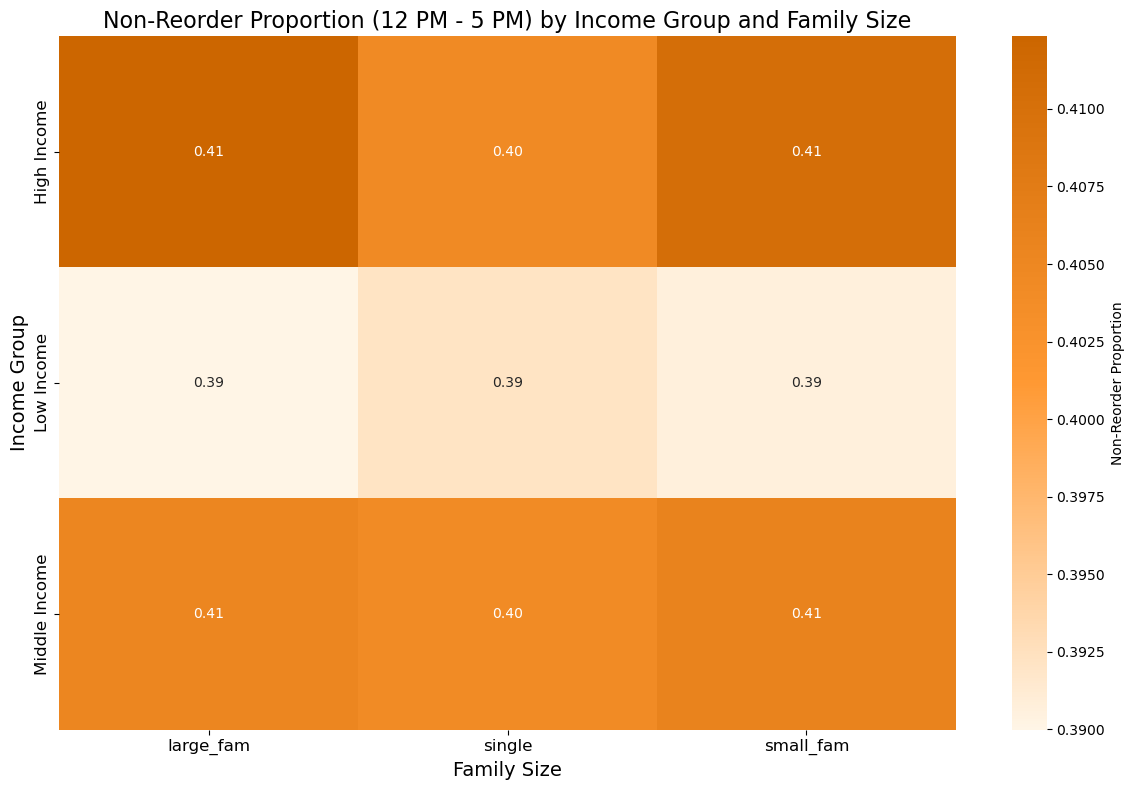

In [189]:
# Filter for orders between 12 PM and 5 PM
filtered_data = merged_df_B[(merged_df_B['order_time'] >= 12) & (merged_df_B['order_time'] < 18)]

# Calculate non-reorder for each row: 1 for non-reorder, 0 for reorder
filtered_data['non_reorder'] = (filtered_data['reorder_status'] == 0).astype(int)

# Group by 'income_group' and 'fam_size' to calculate the non-reorder proportion
heatmap_data = filtered_data.groupby(['income_group', 'fam_size'])['non_reorder'].mean().reset_index()

# Pivot for the heatmap
pivot_df = heatmap_data.pivot(index='income_group', columns='fam_size', values='non_reorder')

# Create a custom colormap centered around #FF9933
colors = ['#FFF5E6', '#FF9933', '#CC6600']  # Light Cream to Vibrant Orange to Dark Orange
custom_cmap = LinearSegmentedColormap.from_list('custom_orange', colors)

# Plot the heatmap
md_demog = plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap=custom_cmap, fmt='.2f', cbar_kws={'label': 'Non-Reorder Proportion'})

# Customize the plot
plt.title('Non-Reorder Proportion (12 PM - 5 PM) by Income Group and Family Size', fontsize=16)
plt.xlabel('Family Size', fontsize=14)
plt.ylabel('Income Group', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [192]:
# Save the plot 
save_path = os.path.join(path, '04 Analysis', 'Viz', 'DEMOG_md.png')
os.makedirs(os.path.dirname(save_path), exist_ok=True)
md_demog.get_figure().savefig(save_path, format='png', dpi=300)

# Print confirmation
print(f"Plot saved to {save_path}")

Plot saved to /Users/amyzhang/Desktop/Instacart Basket Analysis/04 Analysis/Viz/DEMOG_md.png


/var/folders/6r/kznwmt6j1rsfwtfplchqpwj00000gn/T/ipykernel_58748/3995338355.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['non_reorder'] = (filtered_data['reorder_status'] == 0).astype(int)


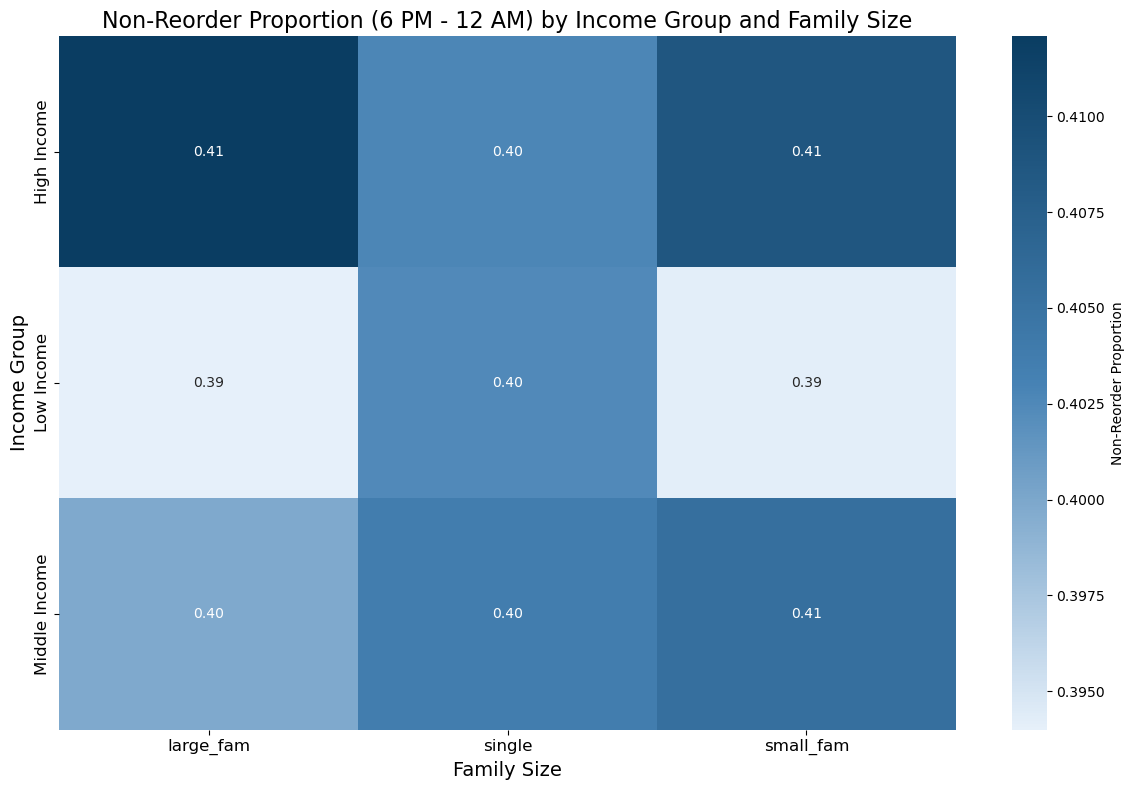

In [195]:
# Filter for orders between 6 PM and midnight
filtered_data = merged_df_B[(merged_df_B['order_time'] >= 18) & (merged_df_B['order_time'] < 24)]

# Calculate non-reorder for each row: 1 for non-reorder, 0 for reorder
filtered_data['non_reorder'] = (filtered_data['reorder_status'] == 0).astype(int)

# Group by 'income_group' and 'fam_size' to calculate the non-reorder proportion
heatmap_data = filtered_data.groupby(['income_group', 'fam_size'])['non_reorder'].mean().reset_index()

# Pivot for the heatmap
pivot_df = heatmap_data.pivot(index='income_group', columns='fam_size', values='non_reorder')

# Create a custom colormap centered around #4682B4
colors = ['#E6F0FA', '#4682B4', '#0A3D62']  # Light Blue to Steel Blue to Dark Blue
custom_cmap = LinearSegmentedColormap.from_list('custom_blue', colors)

# Plot the heatmap
ev_demog = plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap=custom_cmap, fmt='.2f', cbar_kws={'label': 'Non-Reorder Proportion'})

# Customize the plot
plt.title('Non-Reorder Proportion (6 PM - 12 AM) by Income Group and Family Size', fontsize=16)
plt.xlabel('Family Size', fontsize=14)
plt.ylabel('Income Group', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [199]:
# Save the plot 
save_path = os.path.join(path, '04 Analysis', 'Viz', 'DEMOG_ev.png')
os.makedirs(os.path.dirname(save_path), exist_ok=True)
ev_demog.get_figure().savefig(save_path, format='png', dpi=300)

# Print confirmation
print(f"Plot saved to {save_path}")

Plot saved to /Users/amyzhang/Desktop/Instacart Basket Analysis/04 Analysis/Viz/DEMOG_ev.png


/var/folders/6r/kznwmt6j1rsfwtfplchqpwj00000gn/T/ipykernel_58748/3743663080.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['non_reorder'] = (filtered_data['reorder_status'] == 0).astype(int)


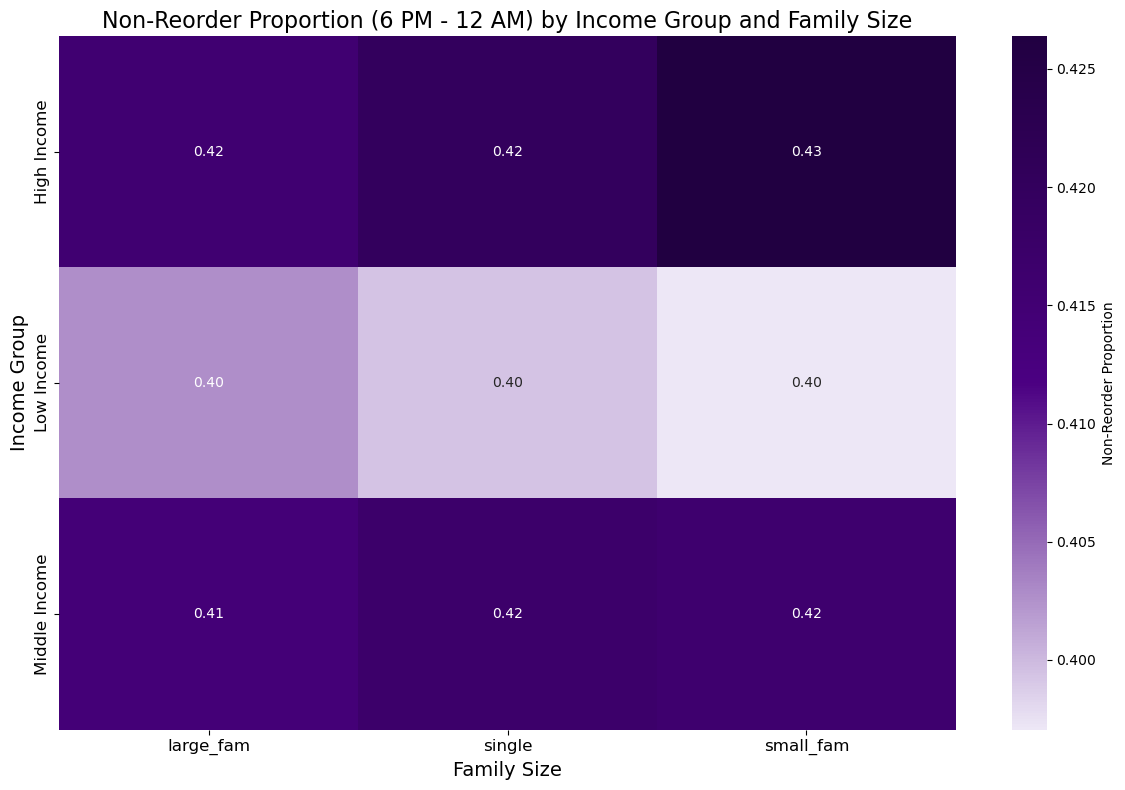

In [202]:
# Filter for orders between 6 PM and midnight
filtered_data = merged_df_B[(merged_df_B['order_time'] >= 0) & (merged_df_B['order_time'] < 6)]

# Calculate non-reorder for each row: 1 for non-reorder, 0 for reorder
filtered_data['non_reorder'] = (filtered_data['reorder_status'] == 0).astype(int)

# Group by 'income_group' and 'fam_size' to calculate the non-reorder proportion
heatmap_data = filtered_data.groupby(['income_group', 'fam_size'])['non_reorder'].mean().reset_index()

# Pivot for the heatmap
pivot_df = heatmap_data.pivot(index='income_group', columns='fam_size', values='non_reorder')

# Create a custom colormap centered around #4B0082
colors = ['#EDE7F6', '#4B0082', '#210041']  # Light Lavender to Indigo to Deep Purple
custom_cmap = LinearSegmentedColormap.from_list('custom_indigo', colors)

# Plot the heatmap
no_demog = plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap=custom_cmap, fmt='.2f', cbar_kws={'label': 'Non-Reorder Proportion'})

# Customize the plot
plt.title('Non-Reorder Proportion (6 PM - 12 AM) by Income Group and Family Size', fontsize=16)
plt.xlabel('Family Size', fontsize=14)
plt.ylabel('Income Group', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [205]:
# Save the plot 
save_path = os.path.join(path, '04 Analysis', 'Viz', 'DEMOG_no.png')
os.makedirs(os.path.dirname(save_path), exist_ok=True)
no_demog.get_figure().savefig(save_path, format='png', dpi=300)

# Print confirmation
print(f"Plot saved to {save_path}")

Plot saved to /Users/amyzhang/Desktop/Instacart Basket Analysis/04 Analysis/Viz/DEMOG_no.png
